In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('hyderabad.csv')
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Addagutta,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Adibatla,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Alkapuri,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ameerpet,2 BHK,1200,2.0,1.0,51.00


In [3]:
df.shape

(1402, 7)

In [4]:
df.isnull().sum()

area_type      0
location       0
size           1
total_sqft     0
bath          11
balcony       71
price          0
dtype: int64

In [5]:
df.dropna(subset=['size'],inplace=True)

In [6]:
df.isnull().sum()

area_type      0
location       0
size           0
total_sqft     0
bath          10
balcony       70
price          0
dtype: int64

In [7]:
for i in df.columns:
    print(f' feature <{i}> has {df[i].unique()} features')
    print('='*100)

 feature <area_type> has ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] features
 feature <location> has ['Addagutta' 'Adibatla' 'Alkapuri' 'Ambedkar Nagar' 'Ameerpet' 'Aminpur'
 'Anjaiah Nagar' 'Anjaneya Nagar' 'Appa Junction' 'Arunodaya Colony'
 'Attapur' 'Ayyappa Society' 'Bachupally' 'Balaji Hills Colony'
 'Bandam Kommu' 'Bandlaguda' 'Bowenpally' 'Bangalore Highway'
 'Banjara Hills' 'Beeramguda' 'Begumpet' 'Boduppal' 'Camelot Layout'
 'Chandanagar' 'D.D. Colony' 'Devender Colony' 'Dilsukh Nagar'
 'Dullapally' 'Film Nagar' 'Financial District' 'Friends Colony'
 'Gachibowli' 'Gajulramaram' 'Gandhi Nagar' 'Gangaram' 'Gopanpally'
 'Hafeezpet' 'Hanuman Nagar' 'Harithavanam Colony' 'Hi-Tech City'
 'Himayat Nagar' 'HMT Swarnapuri Colony' 'Huda Layout' 'Hyder Nagar'
 'Hydershakote' 'Indira Nagar' 'Isnapur' 'Jagruthi Colony'
 'Jai Bharat Nagar' 'Janardana Hills' 'Jubilee Hills' 'Kapra'
 'Kavuri Hills' 'Khairatabad' 'Khajaguda' 'Kistareddypet' 'Kokapet'
 'Kollur' 'Koll

In [8]:
for i in df.columns:
    print(f' feature {i} has {df[i].value_counts()}')
    print('='*100)
    

 feature area_type has area_type
Super built-up  Area    929
Built-up  Area          259
Plot  Area              202
Carpet  Area             11
Name: count, dtype: int64
 feature location has location
Madhura Nagar       10
Lingampally         10
Meerpet             10
Medipally           10
Mayuri Nagar        10
                    ..
Vittal Rao Nagar     8
Whitefield           8
YousufGuda           8
bowenpally           3
Bowenpally           2
Name: count, Length: 146, dtype: int64
 feature size has size
2 BHK        548
3 BHK        460
4 Bedroom     85
1 BHK         59
4 BHK         54
3 Bedroom     54
2 Bedroom     30
5 Bedroom     26
6 Bedroom     25
8 Bedroom     12
1 Bedroom     11
7 Bedroom      8
9 Bedroom      8
5 BHK          7
7 BHK          4
6 BHK          4
1 RK           3
9 BHK          2
11 BHK         1
Name: count, dtype: int64
 feature total_sqft has total_sqft
1200            88
1500            29
1100            19
1000            18
600             16
    

In [9]:
cat_vars = df.select_dtypes(include=['object']).columns
num_vars = df.select_dtypes(include=['int64','float64']).columns
print(f'num_features are {num_vars} \n\ncat_features are {cat_vars}')

num_features are Index(['bath', 'balcony', 'price'], dtype='object') 

cat_features are Index(['area_type', 'location', 'size', 'total_sqft'], dtype='object')


In [10]:
mean_bath = df['bath'].mean()
mean_balcony = df['balcony'].mean()

median_bath = df['bath'].median()
median_balcony = df['balcony'].median()

In [11]:
print(f'median bath value is {median_bath}\n\nmedian balcony value is {median_balcony}')

median bath value is 2.0

median balcony value is 2.0


In [12]:
def impute(df,var,mean_var,median_var):
    df[var+'_mean'] = df[var].fillna(mean_var)
    df[var+'_median'] = df[var].fillna(median_var)

In [13]:
impute(df,'balcony',mean_balcony,median_balcony)
impute(df,'bath',mean_bath,median_bath)

In [14]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,balcony_mean,balcony_median,bath_mean,bath_median
0,Super built-up Area,Addagutta,2 BHK,1056,2.0,1.0,39.07,1.0,1.0,2.0,2.0
1,Plot Area,Adibatla,4 Bedroom,2600,5.0,3.0,120.00,3.0,3.0,5.0,5.0
2,Built-up Area,Alkapuri,3 BHK,1440,2.0,3.0,62.00,3.0,3.0,2.0,2.0
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,3.0,1.0,95.00,1.0,1.0,3.0,3.0
4,Super built-up Area,Ameerpet,2 BHK,1200,2.0,1.0,51.00,1.0,1.0,2.0,2.0


In [15]:
df.isnull().sum()

area_type          0
location           0
size               0
total_sqft         0
bath              10
balcony           70
price              0
balcony_mean       0
balcony_median     0
bath_mean          0
bath_median        0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\1476594385.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[i],label = 'actual',hist = False,kde = True,color='magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\1476594385.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

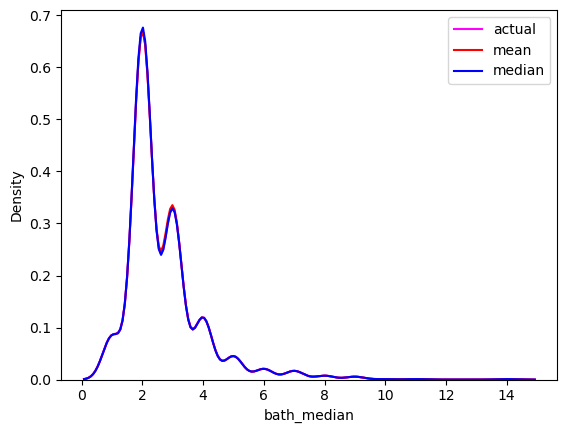

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\1476594385.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[i],label = 'actual',hist = False,kde = True,color='magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\1476594385.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

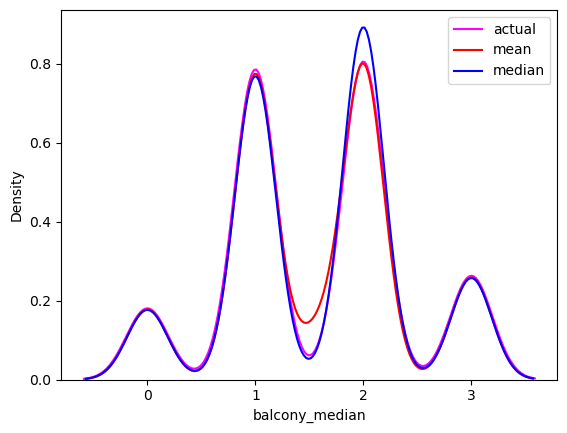

In [16]:
normal_list = ['bath','balcony']
mean_list = ['bath_mean','balcony_mean']
median_list = ['bath_median','balcony_median']
for i,j,k in zip(normal_list,mean_list,median_list):
    sn.distplot(df[i],label = 'actual',hist = False,kde = True,color='magenta')
    sn.distplot(df[j],label = 'mean',hist = False,kde = True,color='red')
    sn.distplot(df[k],label='median',hist=False,kde=True,color='blue')
    plt.legend()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3442873867.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['bath'],hist=False,kde = True,label = 'actual',color = 'magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3442873867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


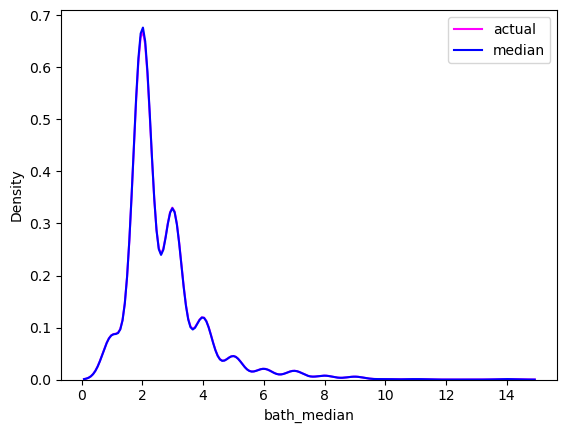

In [17]:
sn.distplot(df['bath'],hist=False,kde = True,label = 'actual',color = 'magenta')
sn.distplot(df['bath_median'],hist=False,kde = True,label = 'median',color = 'blue')
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\2562397343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['bath'],hist=False,kde = True,label = 'actual',color = 'magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\2562397343.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


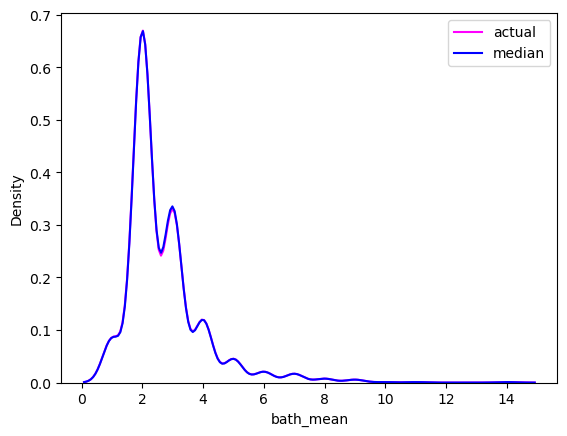

In [18]:
sn.distplot(df['bath'],hist=False,kde = True,label = 'actual',color = 'magenta')
sn.distplot(df['bath_mean'],hist=False,kde = True,label = 'median',color = 'blue')
plt.legend()
plt.show()

**from the above figures we can see that bathroom's null values can be filled with mean,and balcony with median**

In [20]:
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price', 'balcony_mean', 'balcony_median', 'bath_mean', 'bath_median'],
      dtype='object')

In [21]:
df = df.drop(['bath_median','balcony_mean','bath', 'balcony'],axis = 1)
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0


In [22]:
df.isnull().sum()

area_type         0
location          0
size              0
total_sqft        0
price             0
balcony_median    0
bath_mean         0
dtype: int64

In [23]:
pd.set_option('display.max_rows',None)
for i in cat_vars:
    print(f' feature {i} has {df[i].unique()}')
    print('='*100)

 feature area_type has ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
 feature location has ['Addagutta' 'Adibatla' 'Alkapuri' 'Ambedkar Nagar' 'Ameerpet' 'Aminpur'
 'Anjaiah Nagar' 'Anjaneya Nagar' 'Appa Junction' 'Arunodaya Colony'
 'Attapur' 'Ayyappa Society' 'Bachupally' 'Balaji Hills Colony'
 'Bandam Kommu' 'Bandlaguda' 'Bowenpally' 'Bangalore Highway'
 'Banjara Hills' 'Beeramguda' 'Begumpet' 'Boduppal' 'Camelot Layout'
 'Chandanagar' 'D.D. Colony' 'Devender Colony' 'Dilsukh Nagar'
 'Dullapally' 'Film Nagar' 'Financial District' 'Friends Colony'
 'Gachibowli' 'Gajulramaram' 'Gandhi Nagar' 'Gangaram' 'Gopanpally'
 'Hafeezpet' 'Hanuman Nagar' 'Harithavanam Colony' 'Hi-Tech City'
 'Himayat Nagar' 'HMT Swarnapuri Colony' 'Huda Layout' 'Hyder Nagar'
 'Hydershakote' 'Indira Nagar' 'Isnapur' 'Jagruthi Colony'
 'Jai Bharat Nagar' 'Janardana Hills' 'Jubilee Hills' 'Kapra'
 'Kavuri Hills' 'Khairatabad' 'Khajaguda' 'Kistareddypet' 'Kokapet'
 'Kollur' 'Kollur Village' '

In [24]:
pd.set_option('display.max_rows',None)
for i in cat_vars:
    print(f' feature {i} has {df[i].value_counts()}')
    print('='*100)

 feature area_type has area_type
Super built-up  Area    929
Built-up  Area          259
Plot  Area              202
Carpet  Area             11
Name: count, dtype: int64
 feature location has location
Madhura Nagar               10
Lingampally                 10
Meerpet                     10
Medipally                   10
Mayuri Nagar                10
Matrusri Nagar              10
Masjid Banda                10
Masab Tank                  10
Manikonda                   10
Mallampet                   10
Madinaguda                  10
Adibatla                    10
Madhapur                    10
LB Nagar                    10
Miyapur                     10
Laxmi Nagar                 10
Lanco Hills                 10
Lakdi-Ka-Pool               10
Kundanbagh                  10
Kukatpally                  10
Krushi Nagar                10
Krishna Reddy Pet           10
KPHB                        10
Kothaguda                   10
Kondapur                    10
Kollur Village         

In [25]:
num = df['total_sqft'].str.split('-',expand = True)
df['first_val'] = num[0]
df['second_val'] = num[1]
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean,first_val,second_val
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,None
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,None
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,None
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,None
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,None


In [26]:
df['second_val'] = df['second_val'].replace('None','0')

In [27]:
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean,first_val,second_val
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,None
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,None
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,None
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,None
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,None


In [28]:
df['second_val'].fillna(0,inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\522953825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second_val'].fillna(0,inplace = True)


In [29]:
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean,first_val,second_val
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0


In [30]:
df['second_val'].value_counts()

second_val
0        1376
 2850       1
 1093       1
 1116       1
 1455       1
 666        1
 665        1
 5091       1
 1285       1
 645        1
 1130       1
 5249       1
 1195       1
 6800       1
 5002       1
 6640       1
 1145       1
 1440       1
 1740       1
 1540       1
 1340       1
 1105       1
 8156       1
 3450       1
 3410       1
 1884       1
Name: count, dtype: int64

In [31]:
pd.set_option('display.max_rows',None)
df['first_val'].value_counts()

first_val
1200              88
1500              29
1100              19
1000              18
600               16
1600              15
1800              13
2400              13
1150              12
1350              12
950               12
1075              11
1260              10
1020              10
1300              10
1050              10
1250               9
1400               9
1070               8
3000               8
900                8
1140               8
2000               8
1060               8
1450               8
1185               7
1128               7
1170               7
1175               7
1180               7
1025               6
500                6
1240               6
1550               6
850                6
1280               6
700                6
1225               6
1580               5
1090               5
1630               5
1535               5
1475               5
5000               5
525                5
1160               5
1210               5
112

In [32]:
aplha_list = ['S','A','P']
j = 0
for i in range(len(df['first_val'])):
    if i in ['S','A','P']:
        num = df[i].str.split(i,expand=True)
        df[i+'_edited'] = num[0]
    

In [33]:
num = df['first_val'].str.split('A',expand=True)
df['edited_A_val'] = num[0]
pd.set_option('display.max_rows',None)
df['edited_A_val'].value_counts()

edited_A_val
1200              88
1500              29
1100              19
1000              18
600               16
1600              15
1800              13
2400              13
1150              12
1350              12
950               12
1075              11
1260              10
1020              10
1300              10
1050              10
1250               9
1400               9
1070               8
3000               8
900                8
1140               8
2000               8
1060               8
1450               8
1185               7
1128               7
1170               7
1175               7
1180               7
1025               6
500                6
1240               6
1550               6
850                6
1280               6
700                6
1225               6
1580               5
1090               5
1630               5
1535               5
1475               5
5000               5
525                5
1160               5
1210               5


In [34]:
num = df['edited_A_val'].str.split('S',expand = True)
df['edited_A_val'] = num[0]
pd.set_option('display.max_rows',None)
df['edited_A_val'].value_counts()

edited_A_val
1200         88
1500         29
1100         20
1000         19
600          16
1600         15
2400         13
1800         13
950          12
1150         12
1350         12
1075         11
1300         10
1260         10
1050         10
1020         10
1250          9
1400          9
1070          8
1060          8
1450          8
2000          8
1140          8
3000          8
900           8
1128          7
1185          7
1175          7
1170          7
1180          7
850           6
500           6
1240          6
700           6
1225          6
1025          6
1550          6
1280          6
1325          5
1580          5
1475          5
1630          5
1160          5
1125          5
1464          5
5000          5
1210          5
1535          5
525           5
1560          5
1090          5
1540          5
1665          4
1035          4
1590          4
1246          4
1194          4
1460          4
1640          4
3600          4
1080          4
1750       

In [35]:
num = df['edited_A_val'].str.split('P',expand = True)
df['edited_A_val'] = num[0]
pd.set_option('display.max_rows',None)
df['edited_A_val'].value_counts()

edited_A_val
1200       88
1500       29
1100       20
1000       19
600        16
1600       15
2400       13
1800       13
950        12
1150       12
1350       12
1075       11
1300       10
1260       10
1050       10
1020       10
1250        9
1400        9
1070        8
1060        8
1450        8
2000        8
1140        8
3000        8
900         8
1128        7
1185        7
1175        7
1170        7
1180        7
850         6
500         6
1240        6
700         6
1225        6
1025        6
1550        6
1280        6
1325        5
1580        5
1475        5
1630        5
1160        5
1125        5
1464        5
5000        5
1210        5
1535        5
525         5
1560        5
1090        5
1540        5
1665        4
1035        4
1590        4
1246        4
1194        4
1460        4
1640        4
3600        4
1080        4
1750        4
1425        4
1650        4
1875        4
1220        4
1440        4
1282        4
883         4
1005        4
1190   

In [36]:
num = df['edited_A_val'].str.split('.',expand = True)
df['edited_A_val'] = num[0]
pd.set_option('display.max_rows',None)
df['edited_A_val'].value_counts()

edited_A_val
1200     88
1500     29
1100     20
1000     19
600      16
1600     15
2400     13
1800     13
1150     12
1350     12
950      12
1075     11
1020     10
1300     10
1050     10
1260     10
1250      9
1400      9
2000      8
3000      8
1060      8
1070      8
1450      8
1140      8
900       8
1175      7
1180      7
1170      7
1128      7
1185      7
500       6
1550      6
850       6
1240      6
1280      6
700       6
1225      6
1025      6
1580      5
1535      5
525       5
1125      5
1630      5
1325      5
1560      5
1090      5
1540      5
1475      5
1160      5
1464      5
5000      5
1210      5
1875      4
630       4
1460      4
1005      4
1425      4
1665      4
1640      4
1220      4
1120      4
1282      4
1190      4
1330      4
1590      4
1440      4
1194      4
1080      4
1246      4
1650      4
3600      4
883       4
1035      4
1750      4
1192      3
2900      3
1470      3
1082      3
940       3
4000      3
1360      3
880       3
141

In [37]:
df.head()

,area_type,location,size,total_sqft,price,balcony_median,bath_mean,first_val,second_val,edited_A_val
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0,1056
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0,2600
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0,1440
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0,1521
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0,1200


In [38]:
df.columns = ['area_type','location','size','total_Sqft','price','balcony','bathroom','remove','second','first']

In [39]:
df.head(2)

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0,1056
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0,2600


In [40]:
pd.set_option('display.max_rows',None)
df['remove'].value_counts()

remove
1200              88
1500              29
1100              19
1000              18
600               16
1600              15
1800              13
2400              13
1150              12
1350              12
950               12
1075              11
1260              10
1020              10
1300              10
1050              10
1250               9
1400               9
1070               8
3000               8
900                8
1140               8
2000               8
1060               8
1450               8
1185               7
1128               7
1170               7
1175               7
1180               7
1025               6
500                6
1240               6
1550               6
850                6
1280               6
700                6
1225               6
1580               5
1090               5
1630               5
1535               5
1475               5
5000               5
525                5
1160               5
1210               5
1125  

In [41]:
df['second'].value_counts()

second
0        1376
 2850       1
 1093       1
 1116       1
 1455       1
 666        1
 665        1
 5091       1
 1285       1
 645        1
 1130       1
 5249       1
 1195       1
 6800       1
 5002       1
 6640       1
 1145       1
 1440       1
 1740       1
 1540       1
 1340       1
 1105       1
 8156       1
 3450       1
 3410       1
 1884       1
Name: count, dtype: int64

In [42]:
data = df.copy()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1401
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   1401 non-null   object 
 1   location    1401 non-null   object 
 2   size        1401 non-null   object 
 3   total_Sqft  1401 non-null   object 
 4   price       1401 non-null   float64
 5   balcony     1401 non-null   float64
 6   bathroom    1401 non-null   float64
 7   remove      1401 non-null   object 
 8   second      1401 non-null   object 
 9   first       1401 non-null   object 
dtypes: float64(3), object(7)
memory usage: 120.4+ KB


In [44]:
data['second'] = data['second'].astype('float64')
data['first'] = data['first'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1401
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   1401 non-null   object 
 1   location    1401 non-null   object 
 2   size        1401 non-null   object 
 3   total_Sqft  1401 non-null   object 
 4   price       1401 non-null   float64
 5   balcony     1401 non-null   float64
 6   bathroom    1401 non-null   float64
 7   remove      1401 non-null   object 
 8   second      1401 non-null   float64
 9   first       1401 non-null   float64
dtypes: float64(5), object(5)
memory usage: 120.4+ KB


In [45]:
temp = data.loc[data['second']!=0]
temp

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
30,Super built-up Area,Friends Colony,4 BHK,2100 - 2850,186.000,0.0,4.000000,2100,2850.0,2100.0
56,Built-up Area,Kokapet,4 Bedroom,3010 - 3410,192.000,2.0,2.687994,3010,3410.0,3010.0
81,Built-up Area,Medipally,4 Bedroom,2957 - 3450,224.500,2.0,2.687994,2957,3450.0,2957.0
122,Super built-up Area,Secretariat Colony,4 BHK,3067 - 8156,477.000,0.0,4.000000,3067,8156.0,3067.0
137,Super built-up Area,Upparpally,2 BHK,1042 - 1105,54.005,0.0,2.000000,1042,1105.0,1042.0
165,Super built-up Area,Begumpet,2 BHK,1145 - 1340,43.490,0.0,2.000000,1145,1340.0,1145.0
188,Super built-up Area,Hyder Nagar,2 BHK,1015 - 1540,56.800,0.0,2.000000,1015,1540.0,1015.0
224,Super built-up Area,Matrusri Nagar,3 BHK,1520 - 1740,74.820,2.0,2.687994,1520,1740.0,1520.0
549,Super built-up Area,Rajendra Nagar,2 BHK,1195 - 1440,63.770,0.0,2.000000,1195,1440.0,1195.0
661,Super built-up Area,Mehdipatnam,2 BHK,1120 - 1145,48.130,0.0,2.000000,1120,1145.0,1120.0


In [46]:
temp['first'] = (temp['first']+temp['second'])*0.5

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\2698948629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['first'] = (temp['first']+temp['second'])*0.5


In [47]:
use = temp['first']

In [48]:
use = np.array(use)

In [49]:
df.head()

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0,1056
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0,2600
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0,1440
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0,1521
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0,1200


In [50]:
data['total_Sqft'] = df['first']

In [51]:
data.head()

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0.0,1056.0
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0.0,2600.0
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0.0,1440.0
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0.0,1521.0
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0.0,1200.0


In [52]:
df.head()

,area_type,location,size,total_Sqft,price,balcony,bathroom,remove,second,first
0,Super built-up Area,Addagutta,2 BHK,1056,39.07,1.0,2.0,1056,0,1056
1,Plot Area,Adibatla,4 Bedroom,2600,120.00,3.0,5.0,2600,0,2600
2,Built-up Area,Alkapuri,3 BHK,1440,62.00,3.0,2.0,1440,0,1440
3,Super built-up Area,Ambedkar Nagar,3 BHK,1521,95.00,1.0,3.0,1521,0,1521
4,Super built-up Area,Ameerpet,2 BHK,1200,51.00,1.0,2.0,1200,0,1200


In [53]:
data = data.drop(['area_type','total_Sqft','second'],axis = 1)
data.head()

,location,size,price,balcony,bathroom,remove,first
0,Addagutta,2 BHK,39.07,1.0,2.0,1056,1056.0
1,Adibatla,4 Bedroom,120.00,3.0,5.0,2600,2600.0
2,Alkapuri,3 BHK,62.00,3.0,2.0,1440,1440.0
3,Ambedkar Nagar,3 BHK,95.00,1.0,3.0,1521,1521.0
4,Ameerpet,2 BHK,51.00,1.0,2.0,1200,1200.0


In [54]:
data = data.drop(['remove'],axis = 1)
data.head()

,location,size,price,balcony,bathroom,first
0,Addagutta,2 BHK,39.07,1.0,2.0,1056.0
1,Adibatla,4 Bedroom,120.00,3.0,5.0,2600.0
2,Alkapuri,3 BHK,62.00,3.0,2.0,1440.0
3,Ambedkar Nagar,3 BHK,95.00,1.0,3.0,1521.0
4,Ameerpet,2 BHK,51.00,1.0,2.0,1200.0


In [55]:
cat_vars = data.select_dtypes(include=['object']).columns
num_vars = data.select_dtypes(include=['int64','float64']).columns

In [56]:
print(f' num_vars are : {num_vars}\n\ncat_vars are {cat_vars}')

 num_vars are : Index(['price', 'balcony', 'bathroom', 'first'], dtype='object')

cat_vars are Index(['location', 'size'], dtype='object')


In [57]:
pd.set_option('display.max_rows',None)
data['size'].value_counts()

size
2 BHK        548
3 BHK        460
4 Bedroom     85
1 BHK         59
4 BHK         54
3 Bedroom     54
2 Bedroom     30
5 Bedroom     26
6 Bedroom     25
8 Bedroom     12
1 Bedroom     11
7 Bedroom      8
9 Bedroom      8
5 BHK          7
7 BHK          4
6 BHK          4
1 RK           3
9 BHK          2
11 BHK         1
Name: count, dtype: int64

In [58]:
num = data['size'].str.split('B',expand=True)
data['size'] = num[0]
data.head()

,location,size,price,balcony,bathroom,first
0,Addagutta,2,39.07,1.0,2.0,1056.0
1,Adibatla,4,120.00,3.0,5.0,2600.0
2,Alkapuri,3,62.00,3.0,2.0,1440.0
3,Ambedkar Nagar,3,95.00,1.0,3.0,1521.0
4,Ameerpet,2,51.00,1.0,2.0,1200.0


In [59]:
data['size'].value_counts()

size
2       578
3       514
4       139
1        70
5        33
6        29
8        12
7        12
9        10
1 RK      3
11        1
Name: count, dtype: int64

In [60]:
num = data['size'].str.split('R',expand=True)
data['size'] = num[0]
data.head()

,location,size,price,balcony,bathroom,first
0,Addagutta,2,39.07,1.0,2.0,1056.0
1,Adibatla,4,120.00,3.0,5.0,2600.0
2,Alkapuri,3,62.00,3.0,2.0,1440.0
3,Ambedkar Nagar,3,95.00,1.0,3.0,1521.0
4,Ameerpet,2,51.00,1.0,2.0,1200.0


In [61]:
data['size'].value_counts()

size
2      578
3      514
4      139
1       73
5       33
6       29
8       12
7       12
9       10
11       1
Name: count, dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  1401 non-null   object 
 1   size      1401 non-null   object 
 2   price     1401 non-null   float64
 3   balcony   1401 non-null   float64
 4   bathroom  1401 non-null   float64
 5   first     1401 non-null   float64
dtypes: float64(4), object(2)
memory usage: 76.6+ KB


In [63]:
data['size'] = data['size'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  1401 non-null   object 
 1   size      1401 non-null   int64  
 2   price     1401 non-null   float64
 3   balcony   1401 non-null   float64
 4   bathroom  1401 non-null   float64
 5   first     1401 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 76.6+ KB


In [64]:
cat_vars = cat_vars[0:1]
cat_vars

Index(['location'], dtype='object')

In [65]:
df.groupby(['location'])['price'].mean()

location
Addagutta                   172.480000
Adibatla                     78.789000
Alkapuri                     61.279000
Ambedkar Nagar               87.323000
Ameerpet                    100.393000
Aminpur                     136.631000
Anjaiah Nagar               146.334000
Anjaneya Nagar              140.525000
Appa Junction               208.375000
Arunodaya Colony            119.200000
Attapur                      69.290000
Ayyappa Society             121.250000
Bachupally                   78.212000
Balaji Hills Colony         113.665000
Bandam Kommu                144.714000
Bandlaguda                   64.250000
Bangalore Highway            91.500000
Banjara Hills               104.603000
Beeramguda                   99.603000
Begumpet                    149.155500
Boduppal                    215.188000
Bowenpally                   99.250000
Camelot Layout              129.719000
Chandanagar                 134.655000
D.D. Colony                  65.371000
Devender Colony 

In [66]:
mean_map = []
for i in cat_vars:
    mean_map.append(df.groupby([i])['price'].mean())

In [67]:
mean_map

[location
 Addagutta                   172.480000
 Adibatla                     78.789000
 Alkapuri                     61.279000
 Ambedkar Nagar               87.323000
 Ameerpet                    100.393000
 Aminpur                     136.631000
 Anjaiah Nagar               146.334000
 Anjaneya Nagar              140.525000
 Appa Junction               208.375000
 Arunodaya Colony            119.200000
 Attapur                      69.290000
 Ayyappa Society             121.250000
 Bachupally                   78.212000
 Balaji Hills Colony         113.665000
 Bandam Kommu                144.714000
 Bandlaguda                   64.250000
 Bangalore Highway            91.500000
 Banjara Hills               104.603000
 Beeramguda                   99.603000
 Begumpet                    149.155500
 Boduppal                    215.188000
 Bowenpally                   99.250000
 Camelot Layout              129.719000
 Chandanagar                 134.655000
 D.D. Colony                  

In [68]:
j = 0
for i in cat_vars:
    data[i] = data[i].map(mean_map[j]);j+=1

In [69]:
data.head()

,location,size,price,balcony,bathroom,first
0,172.480,2,39.07,1.0,2.0,1056.0
1,78.789,4,120.00,3.0,5.0,2600.0
2,61.279,3,62.00,3.0,2.0,1440.0
3,87.323,3,95.00,1.0,3.0,1521.0
4,100.393,2,51.00,1.0,2.0,1200.0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  1401 non-null   float64
 1   size      1401 non-null   int64  
 2   price     1401 non-null   float64
 3   balcony   1401 non-null   float64
 4   bathroom  1401 non-null   float64
 5   first     1401 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 76.6 KB


In [71]:
import scipy.stats as stats

In [72]:
def plots(df,var):
    plt.figure(figsize=(16,9))
    plt.subplot(1,3,1)
    plt.hist(df[var],bins=50,color = 'magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[var],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(y = df[var],color='magenta')
    
    plt.show()

location


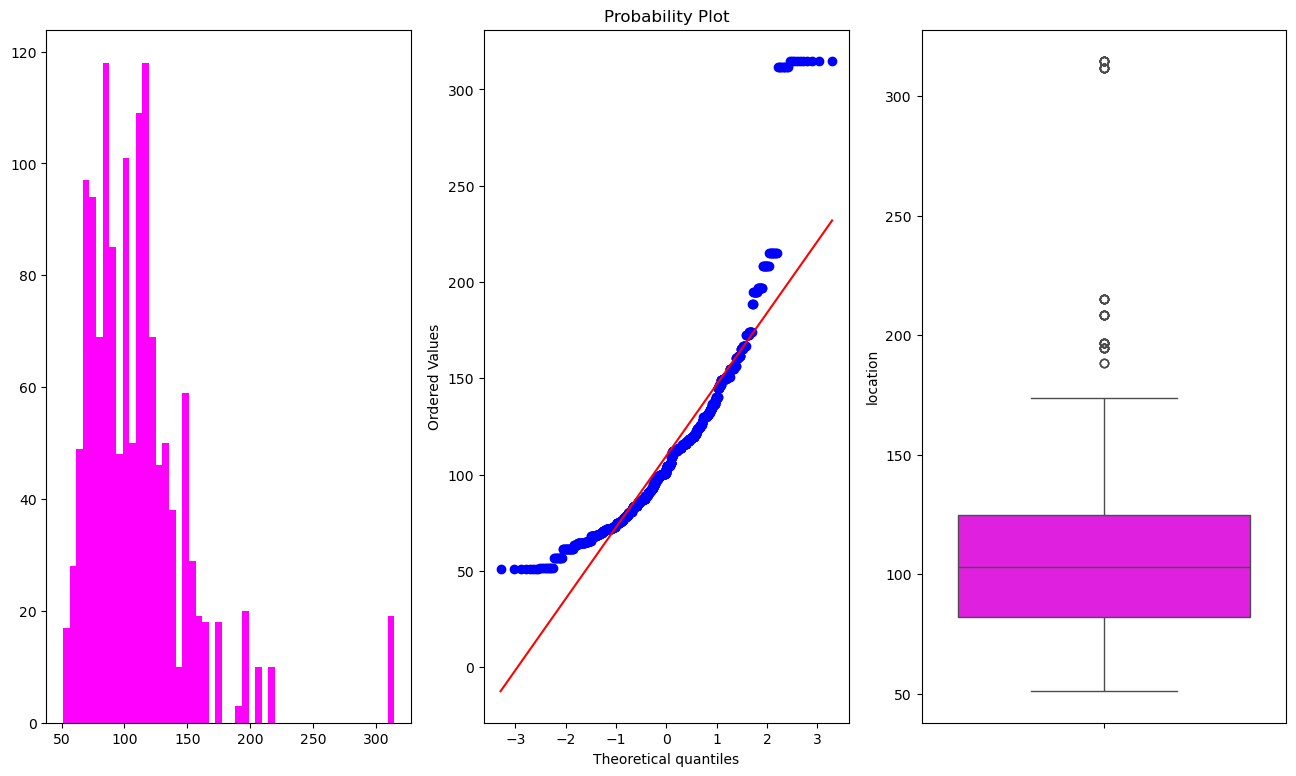

size


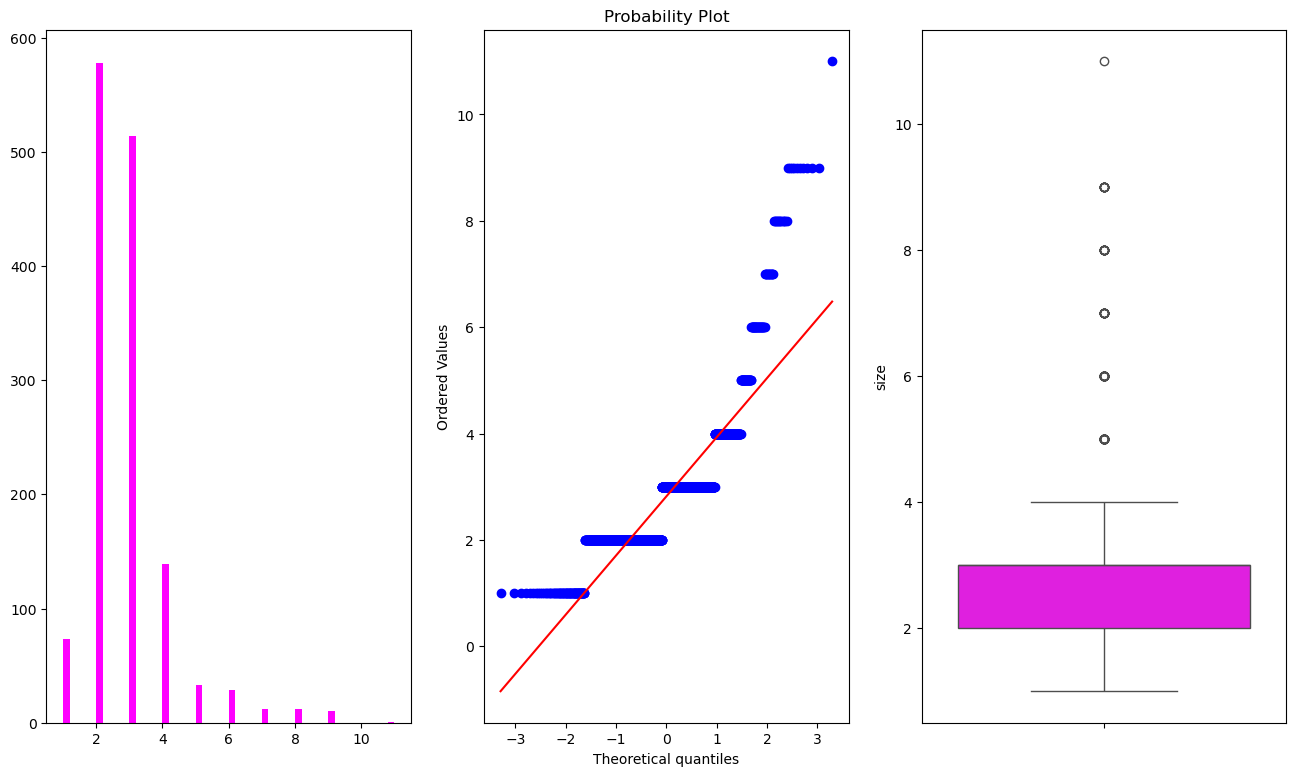

price


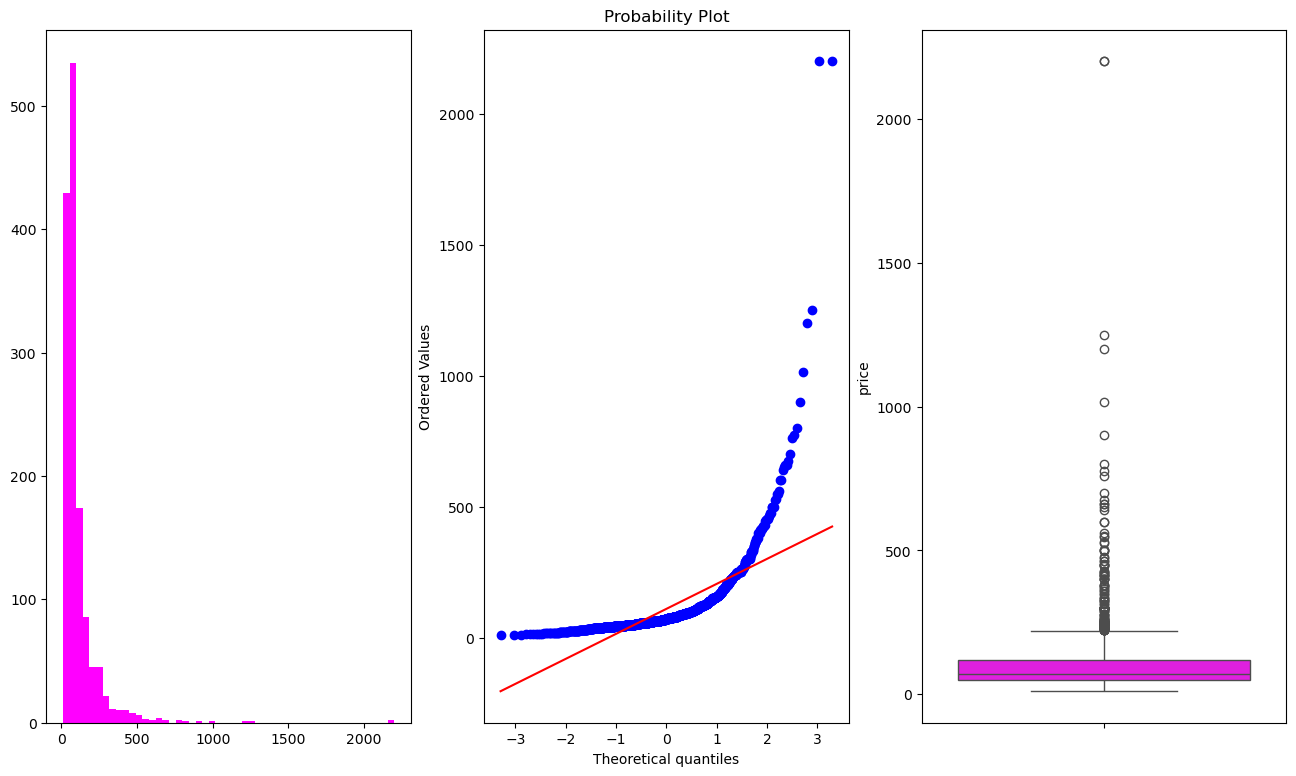

balcony


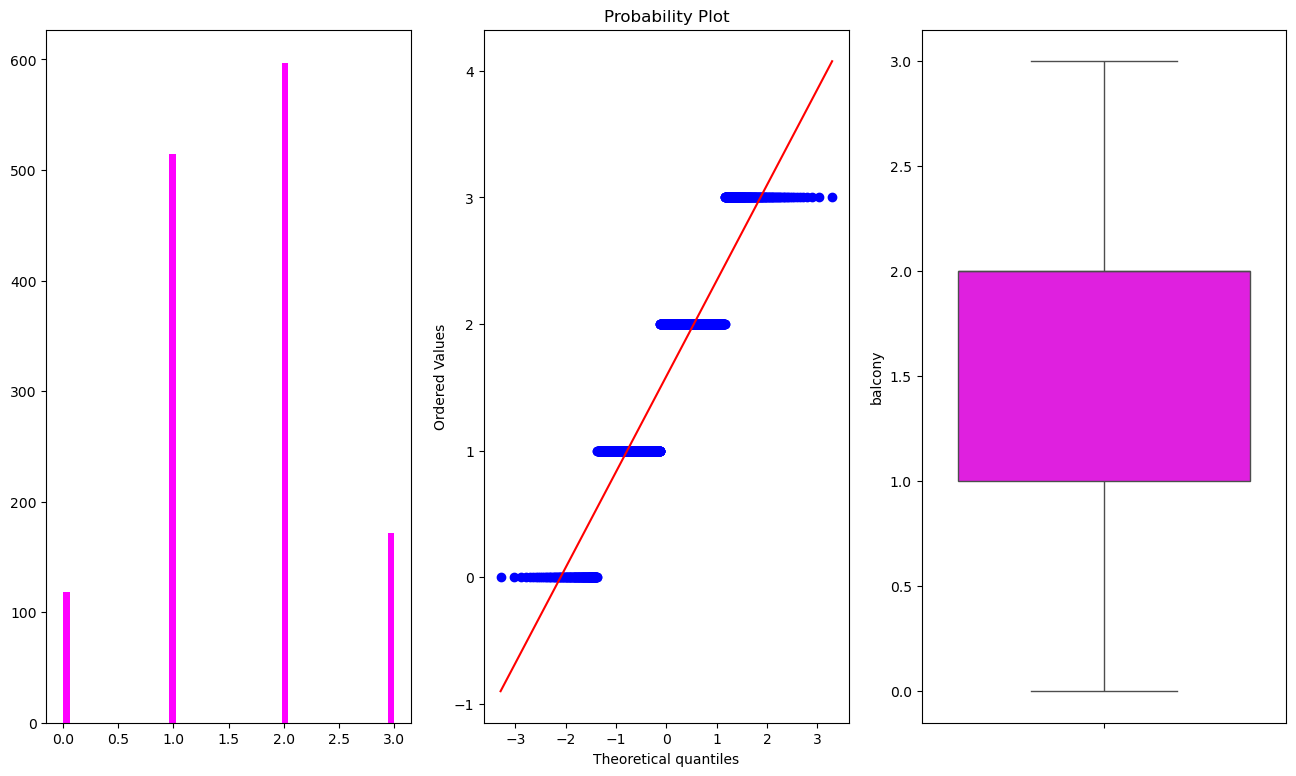

bathroom


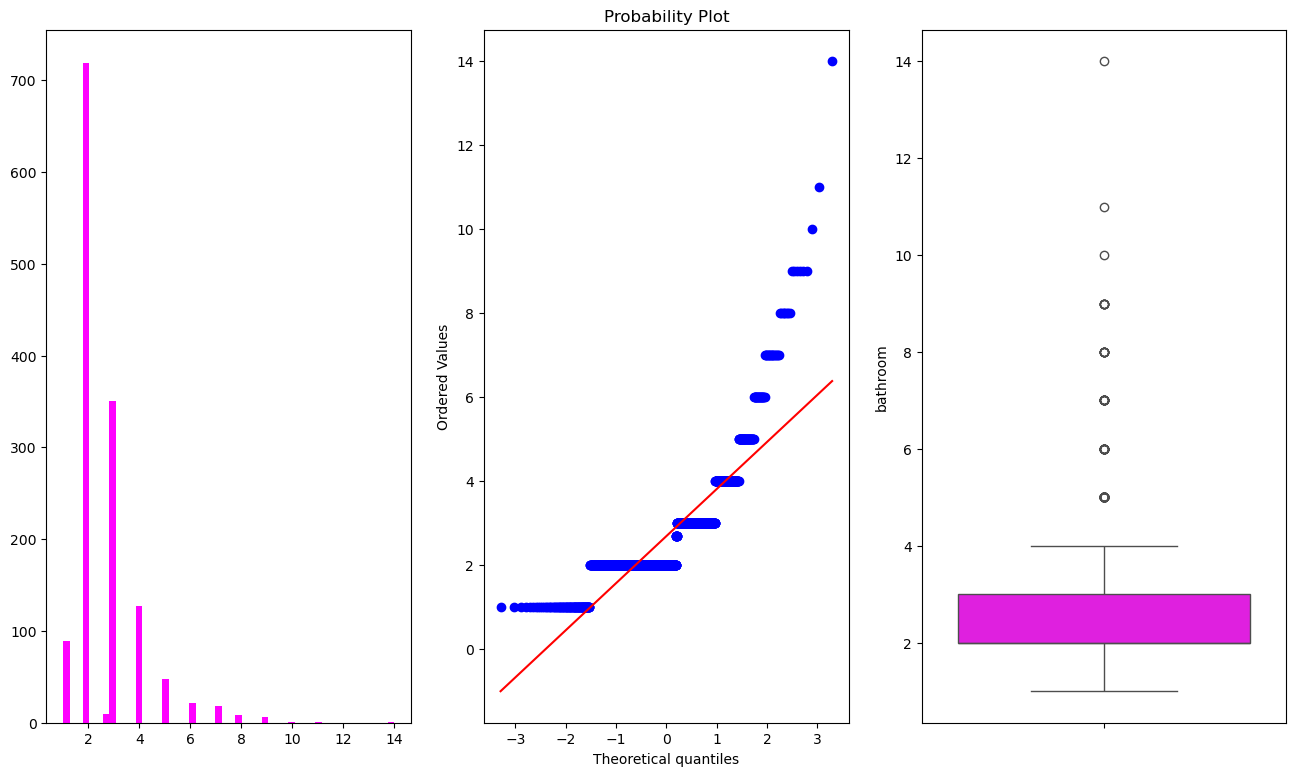

first


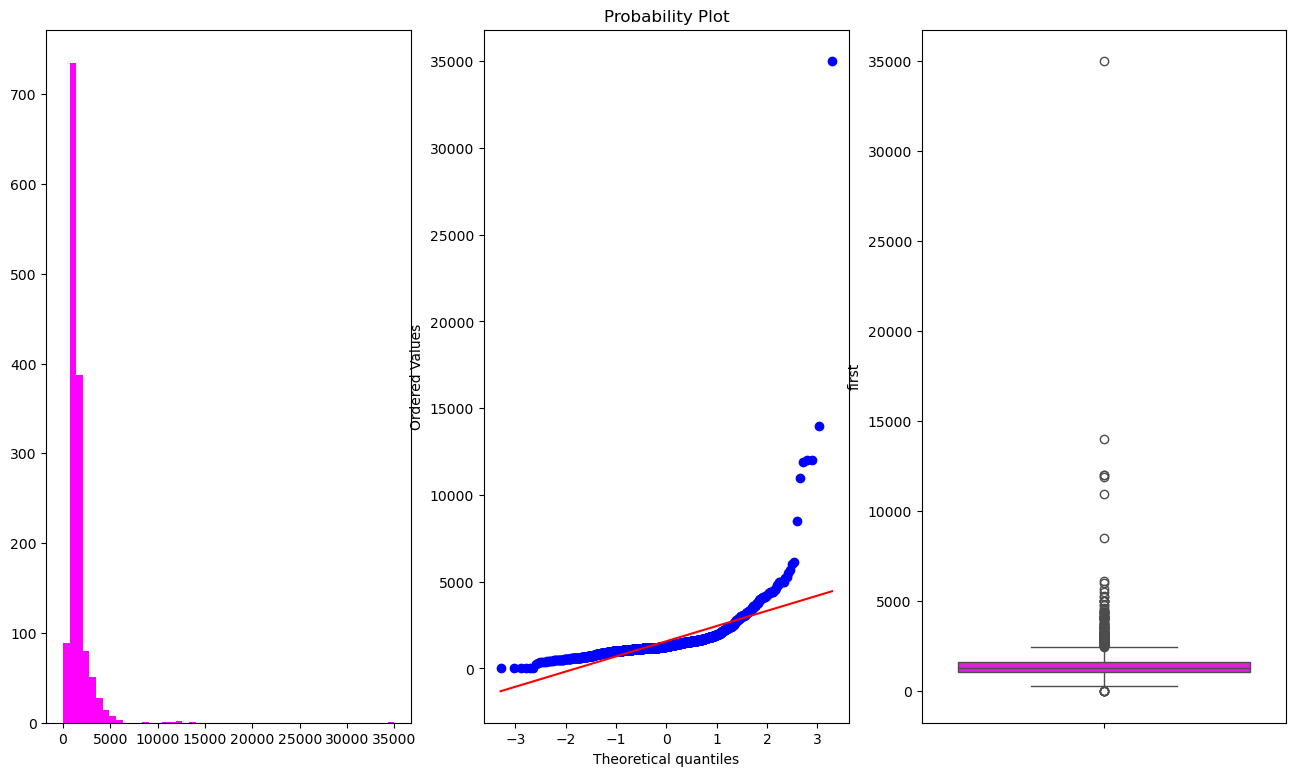

In [73]:
for i in data.columns:
    print(i)
    plots(data,i)
    print('='*100)

In [74]:
data.head()

,location,size,price,balcony,bathroom,first
0,172.480,2,39.07,1.0,2.0,1056.0
1,78.789,4,120.00,3.0,5.0,2600.0
2,61.279,3,62.00,3.0,2.0,1440.0
3,87.323,3,95.00,1.0,3.0,1521.0
4,100.393,2,51.00,1.0,2.0,1200.0


In [75]:
data.columns = ['location','size(bedrooms)','price','balcony','bathroom','total_sqft']

In [76]:
data.head(2)

,location,size(bedrooms),price,balcony,bathroom,total_sqft
0,172.480,2,39.07,1.0,2.0,1056.0
1,78.789,4,120.00,3.0,5.0,2600.0


In [77]:
for i in data.columns:
    print(f' feature {i} has {data[i].value_counts()}')
    print('='*100)

 feature location has location
113.608000    10
125.918000    10
106.192000    10
123.539000    10
109.364000    10
160.742000    10
76.258000     10
129.825000    10
75.126000     10
96.723000     10
71.602000     10
78.789000     10
114.725000    10
150.638000    10
155.012000    10
115.617000    10
87.142000     10
111.804000    10
130.400000    10
112.171000    10
116.969000    10
117.166000    10
196.797000    10
85.970000     10
68.487000     10
74.741000     10
72.247000     10
86.910000     10
154.703000    10
122.558000    10
100.325000    10
149.578000    10
56.773000     10
136.600000    10
70.673000     10
113.928000    10
92.295000     10
119.699000    10
99.194000     10
82.352000     10
115.590000    10
80.527000     10
90.570000     10
86.195000     10
119.430000    10
77.779000     10
124.011000    10
133.509000    10
111.968000    10
104.320000    10
100.580000    10
130.955000    10
166.829000    10
97.600000     10
104.587000    10
115.756500    10
71.403000     10


In [78]:
data.columns

Index(['location', 'size(bedrooms)', 'price', 'balcony', 'bathroom',
       'total_sqft'],
      dtype='object')

In [79]:
int_inst = ['size(bedrooms)','balcony', 'bathroom']
for i in int_inst:
    data[i] = data[i].astype('int64')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1401 non-null   float64
 1   size(bedrooms)  1401 non-null   int64  
 2   price           1401 non-null   float64
 3   balcony         1401 non-null   int64  
 4   bathroom        1401 non-null   int64  
 5   total_sqft      1401 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 76.6 KB


In [81]:
data['size(bedrooms)'].value_counts()

size(bedrooms)
2     578
3     514
4     139
1      73
5      33
6      29
8      12
7      12
9      10
11      1
Name: count, dtype: int64

In [82]:
data['bathroom'].value_counts()

bathroom
2     729
3     351
4     127
1      89
5      48
6      22
7      18
8       8
9       6
11      1
10      1
14      1
Name: count, dtype: int64

In [83]:
max_bath = max(data['bathroom'])
min_bath = min(data['bathroom'])
print(f' max_value is {max_bath}\n\n min_value is {min_bath}')

 max_value is 14

 min_value is 1


In [84]:
avg = np.floor((max_bath+min_bath)*0.5)
avg

7.0

In [85]:
data['avg'] = avg

In [86]:
data['bathroom'] = abs(data['bathroom']-data['avg'])

In [87]:
data['bathroom'].value_counts()

bathroom
5.0    729
4.0    352
3.0    128
6.0     89
2.0     54
1.0     30
0.0     18
7.0      1
Name: count, dtype: int64

In [88]:
data.head()

,location,size(bedrooms),price,balcony,bathroom,total_sqft,avg
0,172.480,2,39.07,1,5.0,1056.0,7.0
1,78.789,4,120.00,3,2.0,2600.0,7.0
2,61.279,3,62.00,3,5.0,1440.0,7.0
3,87.323,3,95.00,1,4.0,1521.0,7.0
4,100.393,2,51.00,1,5.0,1200.0,7.0


In [89]:
data = data.drop(['avg'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1401 non-null   float64
 1   size(bedrooms)  1401 non-null   int64  
 2   price           1401 non-null   float64
 3   balcony         1401 non-null   int64  
 4   bathroom        1401 non-null   float64
 5   total_sqft      1401 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 76.6 KB


In [90]:
data['bathroom'] = data['bathroom'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1401 non-null   float64
 1   size(bedrooms)  1401 non-null   int64  
 2   price           1401 non-null   float64
 3   balcony         1401 non-null   int64  
 4   bathroom        1401 non-null   int64  
 5   total_sqft      1401 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 76.6 KB


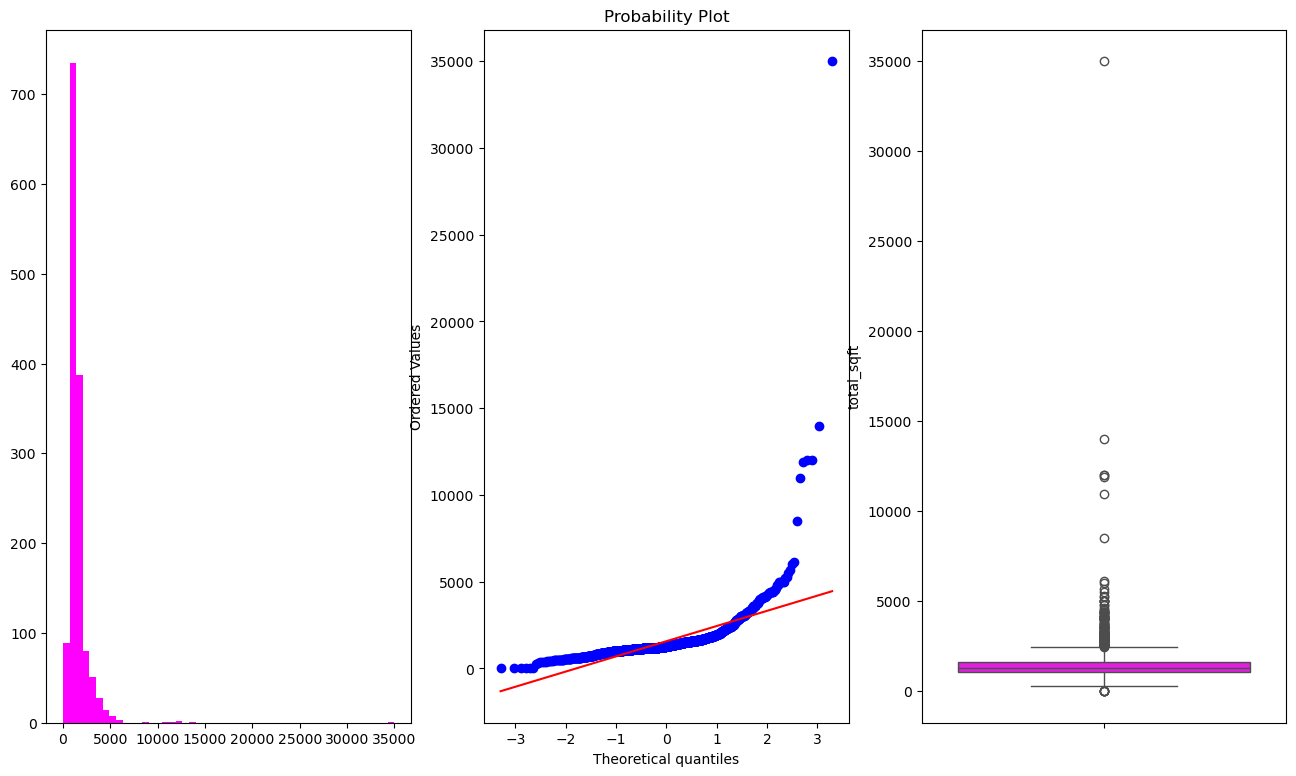

In [91]:
plots(data,'total_sqft')

In [92]:
temp = data.copy()

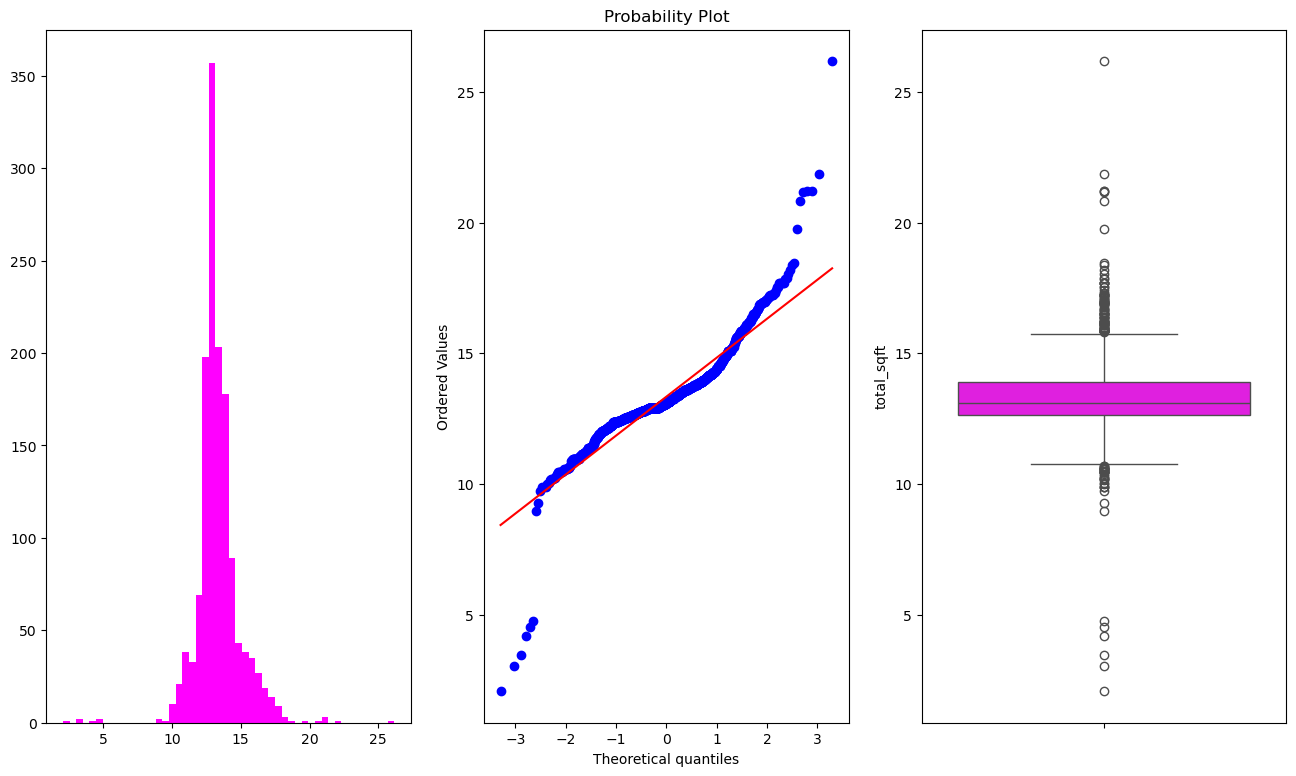

In [93]:
temp['total_sqft'],parameters = stats.boxcox(temp['total_sqft']+1)
plots(temp,'total_sqft')

In [94]:
data.head()

,location,size(bedrooms),price,balcony,bathroom,total_sqft
0,172.480,2,39.07,1,5,1056.0
1,78.789,4,120.00,3,2,2600.0
2,61.279,3,62.00,3,5,1440.0
3,87.323,3,95.00,1,4,1521.0
4,100.393,2,51.00,1,5,1200.0


In [95]:
upper_limit = []
lower_limit = []
for i in data.columns:
    upper_limit.append(data[i].mean() + (data[i].std())*3)
    lower_limit.append(data[i].mean() - (data[i].std())*3)

In [96]:
j = 0
for i in data.columns:
    temp = data[(data[i]>upper_limit[j])|(data[i]<lower_limit[j])];j+=1

In [97]:
temp

,location,size(bedrooms),price,balcony,bathroom,total_sqft
62,196.797000,4,650.0,3,2,5700.0
408,311.855556,7,2200.0,3,1,12000.0
440,146.334000,4,700.0,3,3,11890.0
514,109.364000,4,145.0,2,3,8500.0
605,314.673000,7,2200.0,3,0,12000.0
674,119.430000,3,130.0,3,4,35000.0
810,166.829000,4,80.0,1,3,10961.0
1090,130.955000,4,560.0,2,3,6136.0
1153,140.525000,4,400.0,3,2,6000.0
1234,166.829000,4,800.0,2,4,14000.0


In [98]:
data.shape

(1401, 6)

In [99]:
j = 0
for i in data.columns:
    data = data[(data[i]<upper_limit[j])&(data[i]>lower_limit[j])];j+=1

In [100]:
data.shape

(1322, 6)

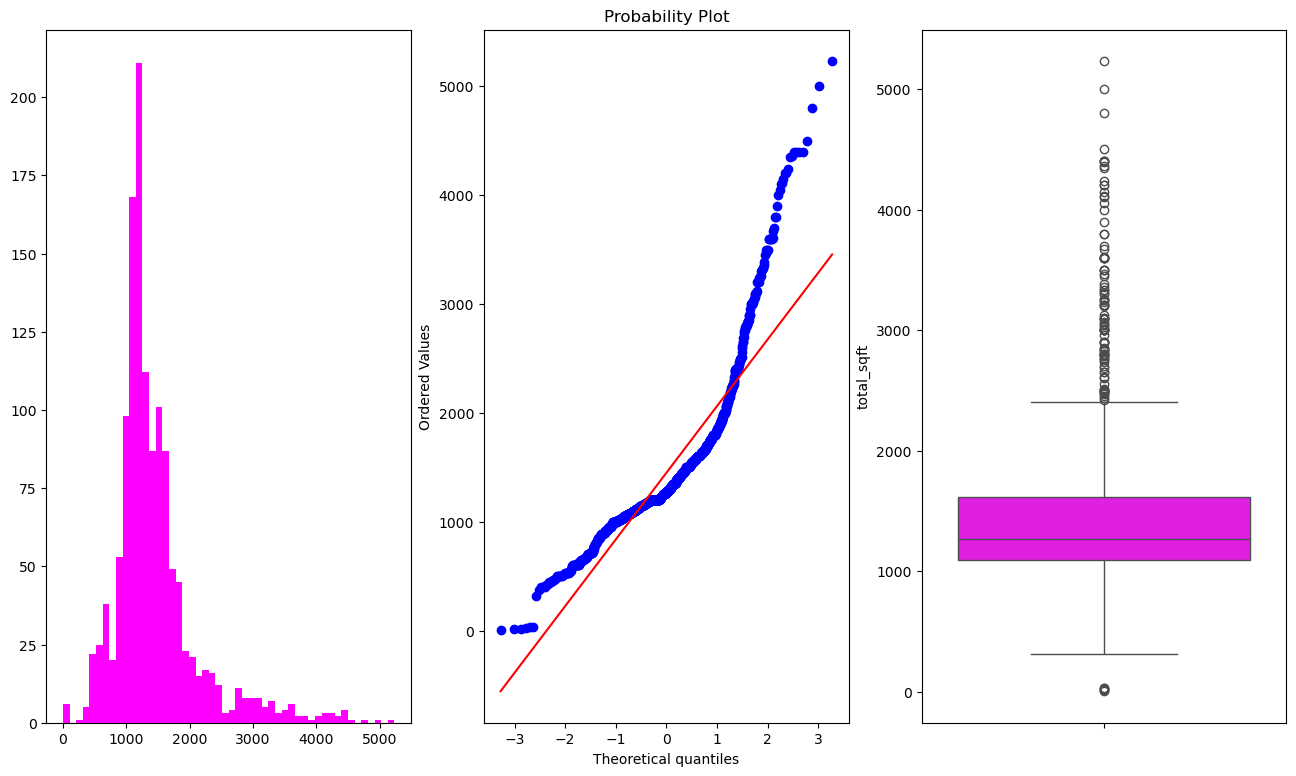

In [101]:
plots(data,'total_sqft')

In [102]:
temp = data.copy()

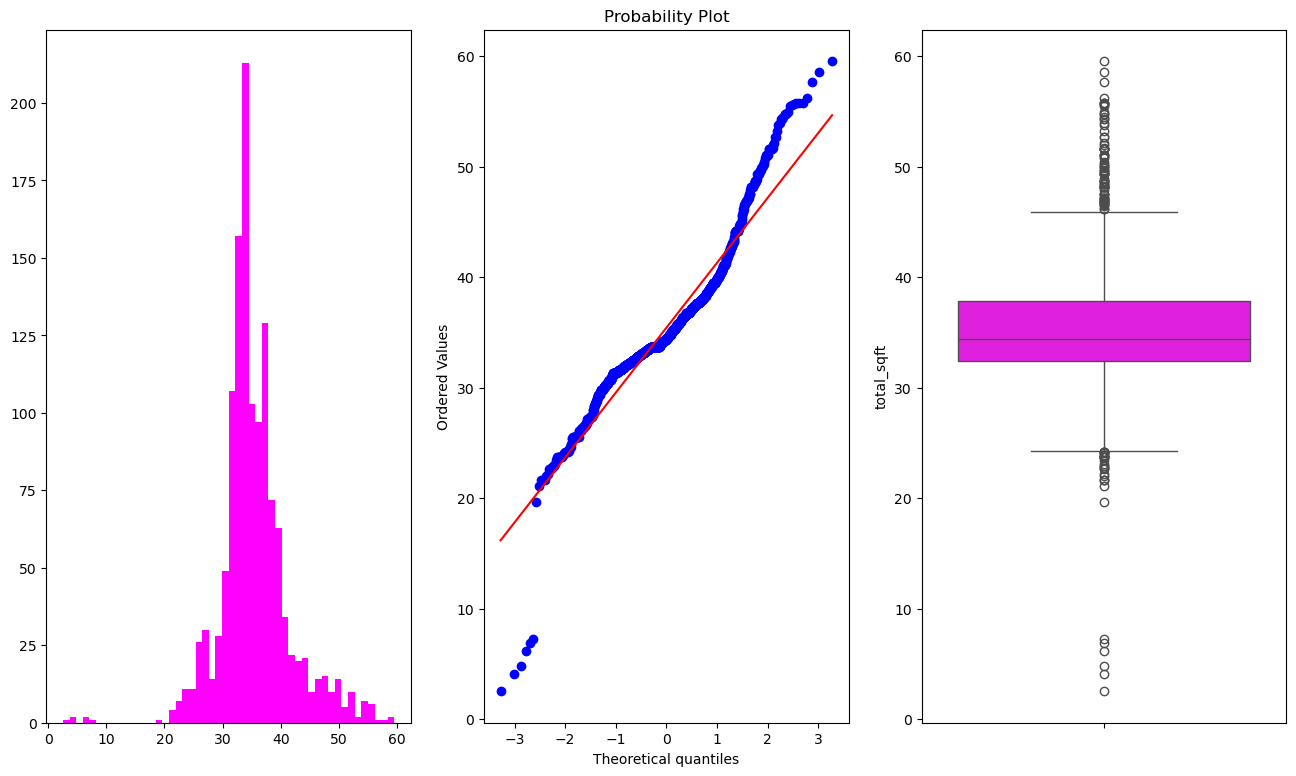

In [103]:
temp['total_sqft'],parameters = stats.boxcox(temp['total_sqft']+1)
plots(temp,'total_sqft')

In [104]:
IQR = temp.total_sqft.quantile(0.75) - temp.total_sqft.quantile(0.25)
IQR

5.430005401723932

In [105]:
upper_bound = (temp['total_sqft'].quantile(0.75) + (IQR*3))
lower_bound = (temp['total_sqft'].quantile(0.25) - (IQR)*3)
print(f' lower bound is {lower_bound}\n upper_bound is {upper_bound}')

 lower bound is 16.139777984207903
 upper_bound is 54.149815796275426


In [106]:
temp1 = temp.loc[(temp['total_sqft']>lower_bound) & (temp['total_sqft']<upper_bound)]

In [107]:
temp1.head()

,location,size(bedrooms),price,balcony,bathroom,total_sqft
0,172.480,2,39.07,1,5,32.023013
1,78.789,4,120.00,3,2,45.541783
2,61.279,3,62.00,3,5,36.183998
3,87.323,3,95.00,1,4,36.968366
4,100.393,2,51.00,1,5,33.681093


In [108]:
temp1.shape

(1300, 6)

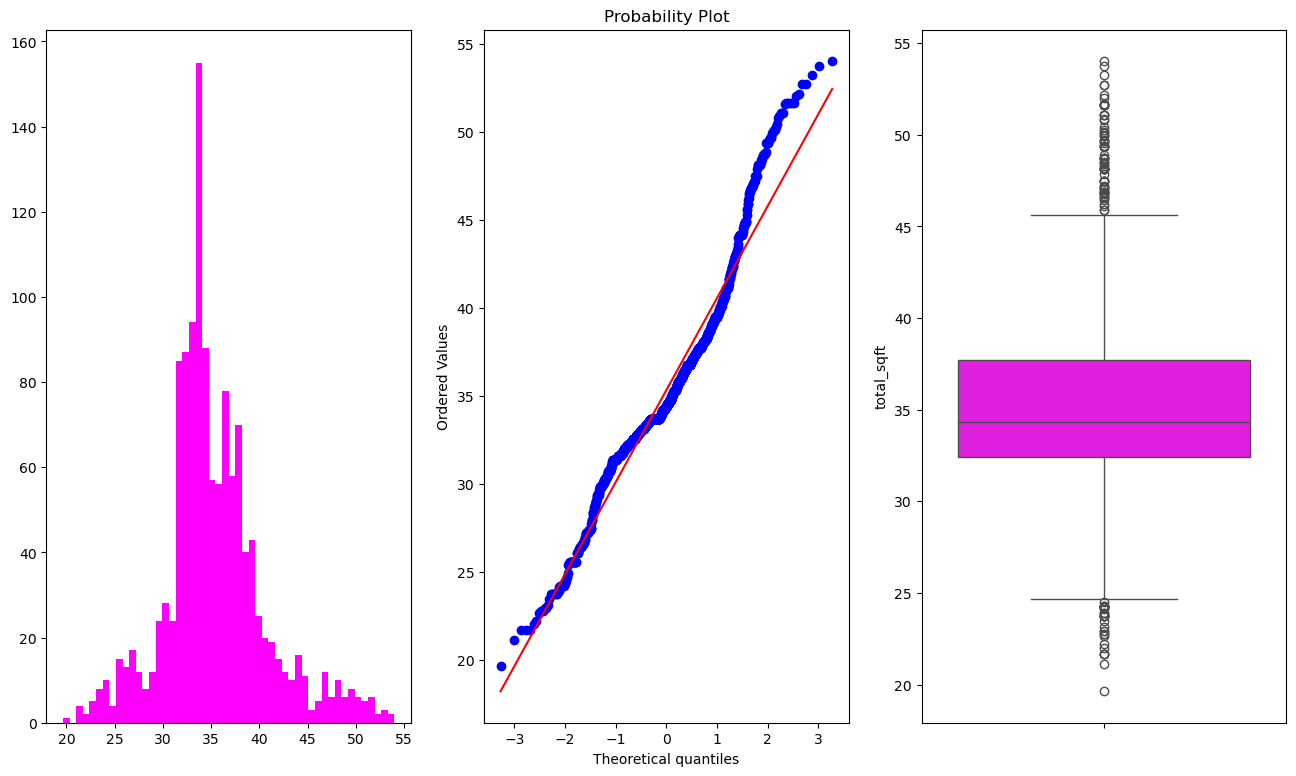

In [109]:
plots(temp1,'total_sqft')

In [110]:
data.head()

,location,size(bedrooms),price,balcony,bathroom,total_sqft
0,172.480,2,39.07,1,5,1056.0
1,78.789,4,120.00,3,2,2600.0
2,61.279,3,62.00,3,5,1440.0
3,87.323,3,95.00,1,4,1521.0
4,100.393,2,51.00,1,5,1200.0


In [111]:
plt.figure(figsize=(16,9))
sn.heatmap(data.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

<Axes: >

In [112]:
test = data['price']

train = data.drop(['price'],axis = 1)

In [113]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import metrics

In [114]:
X_train, X_test, y_train, y_test  = train_test_split(train,test,test_size = 0.2)

In [115]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=['price'])

[Text(0.6546584448513605, 0.9791666666666666, 'total_sqft <= 2280.0\nsquared_error = 6790.352\nsamples = 1057\nvalue = 96.884'),
 Text(0.38144083786315336, 0.9375, 'bathroom <= 4.5\nsquared_error = 2179.011\nsamples = 953\nvalue = 76.747'),
 Text(0.518049641357257, 0.9583333333333333, 'True  '),
 Text(0.12817843172256005, 0.8958333333333334, 'bathroom <= 3.5\nsquared_error = 3138.302\nsamples = 313\nvalue = 113.649'),
 Text(0.016321747742767644, 0.8541666666666666, 'total_sqft <= 927.5\nsquared_error = 4533.313\nsamples = 68\nvalue = 151.181'),
 Text(0.0029482218536944905, 0.8125, 'bathroom <= 2.0\nsquared_error = 1178.346\nsamples = 6\nvalue = 88.65'),
 Text(0.001965481235796327, 0.7708333333333334, 'squared_error = 0.0\nsamples = 1\nvalue = 160.0'),
 Text(0.003930962471592654, 0.7708333333333334, 'total_sqft <= 807.5\nsquared_error = 192.218\nsamples = 5\nvalue = 74.38'),
 Text(0.0029482218536944905, 0.7291666666666666, 'balcony <= 2.5\nsquared_error = 121.688\nsamples = 4\nvalue = 7

In [116]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.00000000e+00, 8.60449103e-16, 1.72089821e-15, 4.73036885e-08,
       1.18259224e-06, 1.99858089e-06, 8.62109745e-06, 1.36707663e-05,
       1.89214759e-05, 2.08609272e-05, 2.95648061e-05, 3.97824030e-05,
       7.56859035e-05, 1.00094607e-04, 1.08987701e-04, 1.18259224e-04,
       1.18259224e-04, 1.18259224e-04, 1.35394986e-04, 1.59129612e-04,
       1.70293283e-04, 1.76017029e-04, 1.93755913e-04, 3.02743614e-04,
       3.09050773e-04, 3.26963103e-04, 4.00378430e-04, 4.63623463e-04,
       4.73036897e-04, 4.73036897e-04, 4.73036897e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 4.73036897e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 4.73036897e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 4.73036897e-04, 4.73036897e-04,
       4.73036897e-04, 4.73036897e-04, 4.82891832e-04, 5.11636708e-04,
       5.51750237e-04, 5.72374645e-04, 6.25591296e-04, 6.30715863e-04,
       6.30715863e-04, 6.30715863e-04, 7.39120151e-04, 7.63166194e-04,
      

In [117]:

!pip install xgboost


In [118]:
alpha_list = []
for i in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)

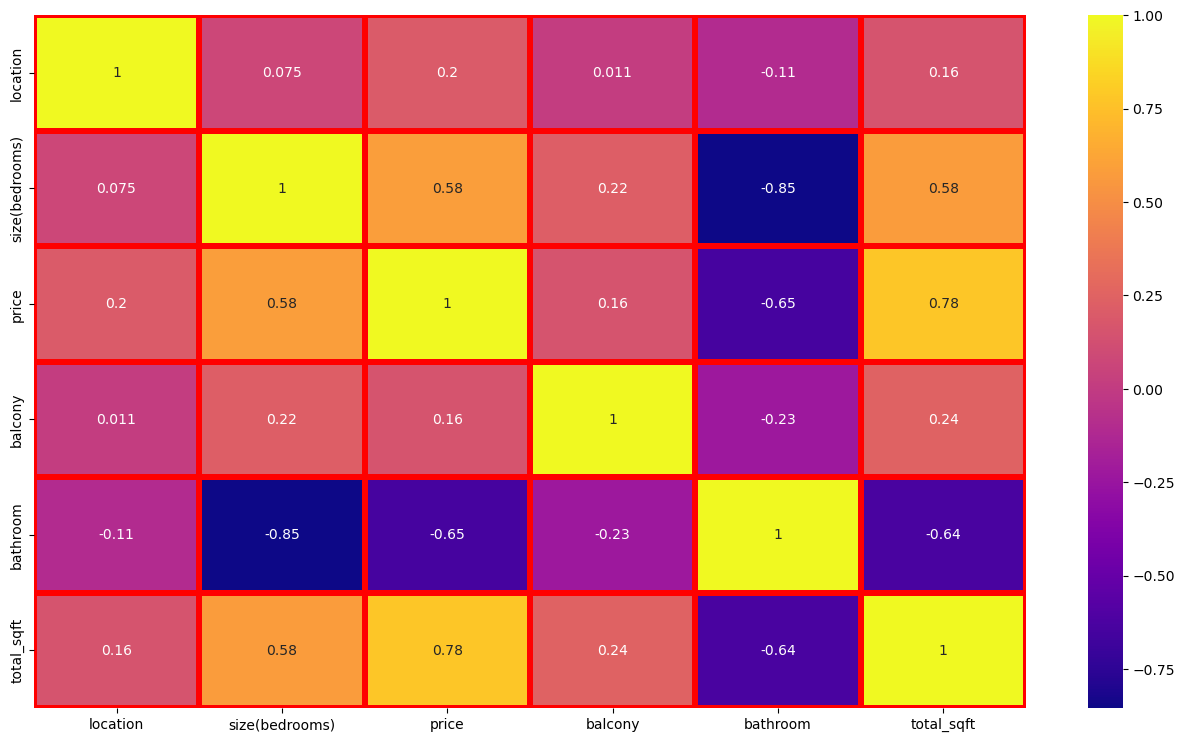

C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


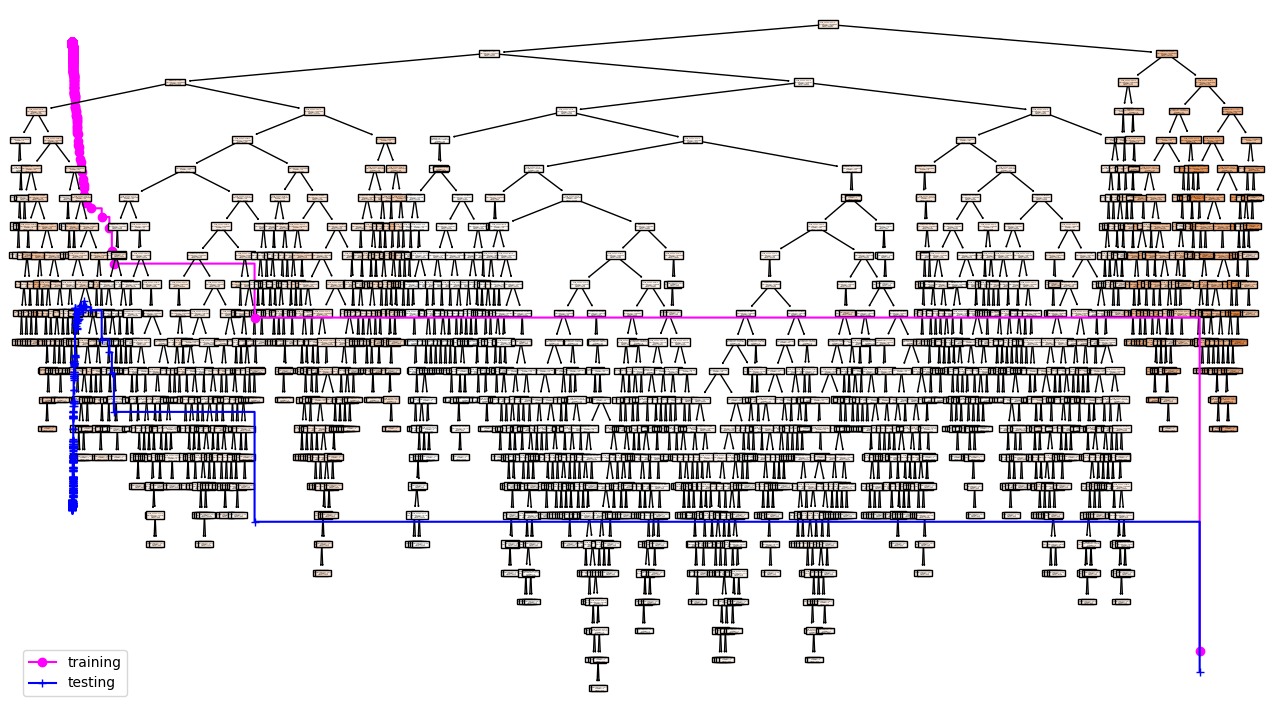

In [119]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score = [clf.score(X_test,y_test) for clf in alpha_list]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alphas,train_score,label = 'training',color = 'magenta',drawstyle = 'steps-post',marker = 'o')
plt.plot(ccp_alphas,test_score,label = 'testing',color = 'blue',drawstyle = 'steps-post',marker = '+')
plt.legend()
plt.show()

In [120]:
alpha_list

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=8.604491029072169e-16, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.7208982058144338e-15, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.730368849280393e-08, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.1825922422207047e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.9985808895874633e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=8.62109744577603e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.3670766319890651e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.892147587338015e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.086092715020049e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.956480605487228e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=3.978240302766777e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=7.568590350169488e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00010009460737920281, random_state=0),
 Decisi

In [121]:
clf = DecisionTreeRegressor(random_state=0,ccp_alpha=200)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=['price'])

[Text(0.6, 0.8333333333333334, 'total_sqft <= 2280.0\nsquared_error = 6790.352\nsamples = 1057\nvalue = 96.884'),
 Text(0.4, 0.5, 'bathroom <= 4.5\nsquared_error = 2179.011\nsamples = 953\nvalue = 76.747'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'squared_error = 3138.302\nsamples = 313\nvalue = 113.649'),
 Text(0.6, 0.16666666666666666, 'squared_error = 718.151\nsamples = 640\nvalue = 58.699'),
 Text(0.8, 0.5, 'squared_error = 11282.837\nsamples = 104\nvalue = 281.404'),
 Text(0.7, 0.6666666666666667, '  False')]

In [122]:
params = {
    'RandomForest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=10)],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[int(x) for x in np.linspace(50,500,10)],
        }
    },
    'DecisionTree':{
        'model':DecisionTreeRegressor(),
        'params':{
            #'criterion':['gini','entropy'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[int(x) for x in np.linspace(50,500,10)],
            'splitter':['best','random'],
        }
    },
    'Gradientboost':{
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=10)],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[int(x) for x in np.linspace(50,500,10)],
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'tol':[1e-10,1e-5,1e-4,0.05,0.25,0.50,0.75],
            'alpha':[0.5,0.6,0.9,1.0,1.5,2.0,2.5,3.0],
            'learning_rate':[0.25,0.50,0.75,1.0],
        }
    },
}

In [123]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv = 5,n_iter = 10,scoring = 'neg_mean_squared_error',verbose = 2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score': clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=400, max_depth=15, max_features=log2, min_samples_leaf=12, min_samples_split=12, n_estimators=1077; total time=   5.5s
[CV] END ccp_alpha=400, max_depth=15, max_features=log2, min_samples_leaf=12, min_samples_split=12, n_estimators=1077; total time=   5.9s
[CV] END ccp_alpha=400, max_depth=15, max_features=log2, min_samples_leaf=12, min_samples_split=12, n_estimators=1077; total time=   5.3s
[CV] END ccp_alpha=400, max_depth=15, max_features=log2, min_samples_leaf=12, min_samples_split=12, n_estimators=1077; total time=   5.2s
[CV] END ccp_alpha=400, max_depth=15, max_features=log2, min_samples_leaf=12, min_samples_split=12, n_estimators=1077; total time=   5.3s
[CV] END ccp_alpha=50, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=50, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=250, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=250, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=250, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=250, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=250, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=150, max_depth=1, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END ccp_alpha=150, max_depth=1, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END ccp_alpha=150, max_depth=1, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END ccp_alpha=150, max_depth=1

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\

In [124]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-2135.715416,"(DecisionTreeRegressor(ccp_alpha=100, max_dept..."
1,DecisionTree,-2266.098031,"DecisionTreeRegressor(ccp_alpha=100, max_depth..."
2,Gradientboost,-7081.263199,"([DecisionTreeRegressor(ccp_alpha=500, criteri..."


In [125]:
for i in scores_df['best_estimator']:
    print(i)
    print('='*100)

RandomForestRegressor(ccp_alpha=100, max_depth=30, max_features='log2',
                      min_samples_leaf=12, n_estimators=955)
DecisionTreeRegressor(ccp_alpha=100, max_depth=30, min_samples_leaf=10,
                      min_samples_split=12)
GradientBoostingRegressor(alpha=0.6, ccp_alpha=500, learning_rate=1.0,
                          loss='quantile', max_depth=1, max_features='sqrt',
                          min_samples_leaf=12, min_samples_split=12,
                          n_estimators=955, tol=1e-05)


In [126]:
rf = RandomForestRegressor(ccp_alpha=50, max_depth=15, min_samples_leaf=10,
                      n_estimators=588)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.7430893683684185

In [127]:
gb = GradientBoostingRegressor(alpha=0.6, ccp_alpha=400, learning_rate=0.5,
                          max_depth=15, max_features='log2',
                          min_samples_leaf=12, n_estimators=344, tol=1e-05)
gb.fit(X_train,y_train)
gb.score(X_train,y_train)

0.6226949056414188

In [128]:
dt = DecisionTreeRegressor(ccp_alpha=100, max_depth=22, min_samples_leaf=2,
                      min_samples_split=10)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

0.7120224898646554

In [129]:
rf.score(X_test,y_test)

0.5993274826276731

### LINEAR MODELS

In [131]:
param_linear = {
    'Linearreg':{
        'model': LinearRegression(),
        'params':{},
    },
    'Lasso':{
        'model':Lasso(),
        'params':{
            'alpha':[0.25,0.50,0.75,1.0,1.5,2.0],
            'max_iter':[int(x) for x in np.linspace(100,1500,10)],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.05,0.25,0.50],
            'selection':['cyclic', 'random'],
        }
    },
    'SVR':{
        'model':SVR(gamma = 'auto'),
        'params':{
            'kernel':['rbf','linear','poly','sigmoid'],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.05,0.25,0.50],
            'C':[0.005,0.025,0.25,0.50,0.75,1.0],
            'max_iter':[int(x) for x in np.linspace(1,250,5)],
        }
    },
    'Ridge':{
        'model':Ridge(),
        'params':{
            'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'alpha':[0.25,0.50,0.75,1.0,1.5,2.0],
            'max_iter':[int(x) for x in np.linspace(100,1500,10)],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.05,0.25,0.50],
        }
    }
}

In [132]:
scores_linear = []
for model_name,mp in param_linear.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv = 5,n_iter = 10,scoring = 'neg_mean_squared_error',verbose = 2)
    clf.fit(X_train,y_train)
    scores_linear.append({
        'model_name':model_name,
        'best_score': clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.75, max_iter=1344, selection=random, tol=0.0001; total time=   0.0s
[CV] END alpha=0.75, max_iter=1344, selection=random, tol=0.0001; total time=   0.0s
[CV] END alpha=0.75, max_iter=1344, selection=random, tol=0.0001; total time=   0.0s
[CV] END alpha=0.75, max_iter=1344, selection=random, tol=0.0001; total time=   0.0s
[CV] END alpha=0.75, max_iter=1344, selection=random, tol=0.0001; total time=   0.0s
[CV] END alpha=0.25, max_iter=566, selection=cycli

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).

[CV] END ........C=0.25, kernel=poly, max_iter=187, tol=0.05; total time=   0.0s
[CV] END ...........C=1.0, kernel=poly, max_iter=63, tol=0.5; total time=   0.0s
[CV] END ...........C=1.0, kernel=poly, max_iter=63, tol=0.5; total time=   0.0s
[CV] END ...........C=1.0, kernel=poly, max_iter=63, tol=0.5; total time=   0.0s
[CV] END ...........C=1.0, kernel=poly, max_iter=63, tol=0.5; total time=   0.0s
[CV] END ...........C=1.0, kernel=poly, max_iter=63, tol=0.5; total time=   0.0s
[CV] END .......C=0.75, kernel=sigmoid, max_iter=1, tol=0.05; total time=   0.0s
[CV] END .......C=0.75, kernel=sigmoid, max_iter=1, tol=0.05; total time=   0.0s
[CV] END .......C=0.75, kernel=sigmoid, max_iter=1, tol=0.05; total time=   0.0s
[CV] END .......C=0.75, kernel=sigmoid, max_iter=1, tol=0.05; total time=   0.0s
[CV] END .......C=0.75, kernel=sigmoid, max_iter=1, tol=0.05; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consi

[CV] END ........C=0.025, kernel=rbf, max_iter=125, tol=0.25; total time=   0.0s
[CV] END ........C=0.025, kernel=rbf, max_iter=125, tol=0.25; total time=   0.0s
[CV] END ........C=0.025, kernel=rbf, max_iter=125, tol=0.25; total time=   0.0s
[CV] END ........C=0.025, kernel=rbf, max_iter=125, tol=0.25; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........C=0.025, kernel=rbf, max_iter=125, tol=0.25; total time=   0.0s
[CV] END .....C=0.5, kernel=sigmoid, max_iter=187, tol=1e-05; total time=   0.0s
[CV] END .....C=0.5, kernel=sigmoid, max_iter=187, tol=1e-05; total time=   0.0s
[CV] END .....C=0.5, kernel=sigmoid, max_iter=187, tol=1e-05; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  

[CV] END .....C=0.5, kernel=sigmoid, max_iter=187, tol=1e-05; total time=   0.0s
[CV] END .....C=0.5, kernel=sigmoid, max_iter=187, tol=1e-05; total time=   0.0s
[CV] END ..........C=0.25, kernel=rbf, max_iter=1, tol=0.001; total time=   0.0s
[CV] END ..........C=0.25, kernel=rbf, max_iter=1, tol=0.001; total time=   0.0s
[CV] END ..........C=0.25, kernel=rbf, max_iter=1, tol=0.001; total time=   0.0s
[CV] END ..........C=0.25, kernel=rbf, max_iter=1, tol=0.001; total time=   0.0s
[CV] END ..........C=0.25, kernel=rbf, max_iter=1, tol=0.001; total time=   0.0s
[CV] END ..........C=0.75, kernel=poly, max_iter=1, tol=0.05; total time=   0.0s
[CV] END ..........C=0.75, kernel=poly, max_iter=1, tol=0.05; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider

[CV] END ..........C=0.75, kernel=poly, max_iter=1, tol=0.05; total time=   0.0s
[CV] END ..........C=0.75, kernel=poly, max_iter=1, tol=0.05; total time=   0.0s
[CV] END ..........C=0.75, kernel=poly, max_iter=1, tol=0.05; total time=   0.0s
[CV] END ...C=0.025, kernel=sigmoid, max_iter=250, tol=1e-05; total time=   0.0s
[CV] END ...C=0.025, kernel=sigmoid, max_iter=250, tol=1e-05; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...C=0.025, kernel=sigmoid, max_iter=250, tol=1e-05; total time=   0.0s
[CV] END ...C=0.025, kernel=sigmoid, max_iter=250, tol=1e-05; total time=   0.0s
[CV] END ...C=0.025, kernel=sigmoid, max_iter=250, tol=1e-05; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.5, kernel=rbf, max_iter=187, tol=1e-05; total time=   0.0s
[CV] END .........C=0.5, kernel=rbf, max_iter=187, tol=1e-05; total time=   0.0s
[CV] END .........C=0.5, kernel=rbf, max_iter=187, tol=1e-05; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.5, kernel=rbf, max_iter=187, tol=1e-05; total time=   0.0s
[CV] END .........C=0.5, kernel=rbf, max_iter=187, tol=1e-05; total time=   0.0s
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......alpha=1.5, max_iter=100, solver=saga, tol=0.5; total time=   0.0s
[CV] END ......alpha=1.5, max_iter=100, solver=saga, tol=0.5; total time=   0.0s
[CV] END ......alpha=1.5, max_iter=100, solver=saga, tol=0.5; total time=   0.0s
[CV] END ......alpha=1.5, max_iter=100, solver=saga, tol=0.5; total time=   0.0s
[CV] END ......alpha=1.5, max_iter=100, solver=saga, tol=0.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=187).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END alpha=0.25, max_iter=1033, solver=cholesky, tol=1e-10; total time=   0.0s
[CV] END alpha=0.25, max_iter=1033, solver=cholesky, tol=1e-10; total time=   0.0s
[CV] END alpha=0.25, max_iter=1033, solver=cholesky, tol=1e-10; total time=   0.0s
[CV] END alpha=0.25, max_iter=1033, solver=cholesky, tol=1e-10; total time=   0.0s
[CV] END alpha=0.25, max_iter=1033, solver=cholesky, tol=1e-10; total time=   0.0s
[CV] END ....alpha=0.25, max_iter=1188, solver=svd, tol=0.05; total time=   0.0s
[CV] END ....alpha=0.25, max_iter=1188, solver=svd, tol=0.05; total time=   0.0s
[CV] END ....alpha=0.25, max_iter=1188, solver=svd, tol=0.05; total time=   0.0s
[CV] END ....alpha=0.25, max_iter=1188, solver=svd, tol=0.05; total time=   0.0s
[CV] END ....alpha=0.25, max_iter=1188, solver=svd, tol=0.05; total time=   0.0s
[CV] END ......alpha=1.0, max_iter=411, solver=lsqr, tol=0.5; total time=   0.0s
[CV] END ......alpha=1.0, max_iter=411, solver=lsqr, tol=0.5; total time=   0.0s
[CV] END ......alp

In [133]:
scores_linear = pd.DataFrame(scores_linear,columns=['model_name','best_score','best_estimator'])
scores_linear

,model_name,best_score,best_estimator
0,Linearreg,-2322.202036,LinearRegression()
1,Lasso,-2307.199841,"Lasso(alpha=2.0, max_iter=877, tol=0.25)"
2,SVR,-6809.247360,"SVR(C=0.025, gamma='auto', max_iter=125, tol=0..."
3,Ridge,-2321.655132,"Ridge(alpha=2.0, max_iter=1188, solver='choles..."


In [134]:
for i in scores_linear['best_estimator']:
    print(i)
    print('='*75)

LinearRegression()
Lasso(alpha=2.0, max_iter=877, tol=0.25)
SVR(C=0.025, gamma='auto', max_iter=125, tol=0.25)
Ridge(alpha=2.0, max_iter=1188, solver='cholesky', tol=1e-10)


In [135]:
ridge = Ridge(max_iter=255, solver='cholesky', tol=1e-10)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.6682671939282399

In [136]:
lasso = Lasso(alpha=0.5, max_iter=100, tol=0.5)
lasso.fit(X_train,y_train)
lasso.score(X_train,y_train)

0.6672801104321944

In [137]:
params_xgb = {
    'n_estimator' : [int(x) for x in np.linspace(start=100,stop=1200,num=10)],
    'learning_rate':[1e-3,0.025,0.050,0.25,0.50],
    'booster':['gbtree' , 'gblinear','dart'],
    'gamma': [1e-3,0.025,0.50,1.0,1.5],
    'reg_alpha':[0.25,0.50,0.75,1.0,1.5],
    'reg_lambda':[1,1.5,2,2.5,3],
    'importance_type':["gain",
    "weight", "cover", "total_gain","total_cover"],
}

In [138]:
xgb = RandomizedSearchCV(XGBRegressor(),param_distributions=params_xgb,cv = 5,n_iter=10,scoring='neg_mean_squared_error',
                        verbose = 2)
xgb.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gblinear, gamma=1.0, importance_type=cover, learning_rate=0.25, n_estimator=100, reg_alpha=1.0, reg_lambda=2; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, gamma=1.0, importance_type=cover, learning_rate=0.25, n_estimator=100, reg_alpha=1.0, reg_lambda=2; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=cover, learning_rate=0.25, n_estimator=100, reg_alpha=1.0, reg_lambda=2; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=cover, learning_rate=0.25, n_estimator=100, reg_alpha=1.0, reg_lambda=2; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, gamma=1.0, importance_type=cover, learning_rate=0.25, n_estimator=100, reg_alpha=1.0, reg_lambda=2; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.05, n_estimator=222, reg_alpha=1.0, reg_lambda=1.5; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.05, n_estimator=222, reg_alpha=1.0, reg_lambda=1.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.05, n_estimator=222, reg_alpha=1.0, reg_lambda=1.5; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.05, n_estimator=222, reg_alpha=1.0, reg_lambda=1.5; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.05, n_estimator=222, reg_alpha=1.0, reg_lambda=1.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=gain, learning_rate=0.025, n_estimator=344, reg_alpha=0.75, reg_lambda=1; total time=   1.3s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=gain, learning_rate=0.025, n_estimator=344, reg_alpha=0.75, reg_lambda=1; total time=   1.2s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=gain, learning_rate=0.025, n_estimator=344, reg_alpha=0.75, reg_lambda=1; total time=   0.9s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=gain, learning_rate=0.025, n_estimator=344, reg_alpha=0.75, reg_lambda=1; total time=   0.9s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=gain, learning_rate=0.025, n_estimator=344, reg_alpha=0.75, reg_lambda=1; total time=   0.9s
[CV] END booster=gbtree, gamma=0.025, importance_type=weight, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=1.5; total time=   0.1s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, gamma=0.025, importance_type=weight, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=1.5; total time=   0.1s
[CV] END booster=gbtree, gamma=0.025, importance_type=weight, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=1.5; total time=   0.1s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, gamma=0.025, importance_type=weight, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=1.5; total time=   0.2s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, gamma=0.025, importance_type=weight, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=1.5; total time=   0.2s
[CV] END booster=gblinear, gamma=0.5, importance_type=cover, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s
[CV] END booster=gblinear, gamma=0.5, importance_type=cover, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, gamma=0.5, importance_type=cover, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s
[CV] END booster=gblinear, gamma=0.5, importance_type=cover, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s
[CV] END booster=gblinear, gamma=0.5, importance_type=cover, learning_rate=0.025, n_estimator=222, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=weight, learning_rate=0.001, n_estimator=1200, reg_alpha=0.25, reg_lambda=1.5; total time=   1.2s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=weight, learning_rate=0.001, n_estimator=1200, reg_alpha=0.25, reg_lambda=1.5; total time=   1.2s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=weight, learning_rate=0.001, n_estimator=1200, reg_alpha=0.25, reg_lambda=1.5; total time=   1.3s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=weight, learning_rate=0.001, n_estimator=1200, reg_alpha=0.25, reg_lambda=1.5; total time=   1.1s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=dart, gamma=0.5, importance_type=weight, learning_rate=0.001, n_estimator=1200, reg_alpha=0.25, reg_lambda=1.5; total time=   1.2s
[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.25, n_estimator=1200, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.25, n_estimator=1200, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.25, n_estimator=1200, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.25, n_estimator=1200, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s
[CV] END booster=gblinear, gamma=1.0, importance_type=total_gain, learning_rate=0.25, n_estimator=1200, reg_alpha=0.25, reg_lambda=2.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, gamma=0.025, importance_type=weight, learning_rate=0.25, n_estimator=222, reg_alpha=0.5, reg_lambda=3; total time=   0.0s
[CV] END booster=gblinear, gamma=0.025, importance_type=weight, learning_rate=0.25, n_estimator=222, reg_alpha=0.5, reg_lambda=3; total time=   0.0s
[CV] END booster=gblinear, gamma=0.025, importance_type=weight, learning_rate=0.25, n_estimator=222, reg_alpha=0.5, reg_lambda=3; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, gamma=0.025, importance_type=weight, learning_rate=0.25, n_estimator=222, reg_alpha=0.5, reg_lambda=3; total time=   0.0s
[CV] END booster=gblinear, gamma=0.025, importance_type=weight, learning_rate=0.25, n_estimator=222, reg_alpha=0.5, reg_lambda=3; total time=   0.0s
[CV] END booster=gblinear, gamma=0.5, importance_type=total_cover, learning_rate=0.025, n_estimator=1077, reg_alpha=0.75, reg_lambda=1.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bs

[CV] END booster=gblinear, gamma=0.5, importance_type=total_cover, learning_rate=0.025, n_estimator=1077, reg_alpha=0.75, reg_lambda=1.5; total time=   0.0s
[CV] END booster=gblinear, gamma=0.5, importance_type=total_cover, learning_rate=0.025, n_estimator=1077, reg_alpha=0.75, reg_lambda=1.5; total time=   0.0s
[CV] END booster=gblinear, gamma=0.5, importance_type=total_cover, learning_rate=0.025, n_estimator=1077, reg_alpha=0.75, reg_lambda=1.5; total time=   0.0s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "gamma", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, gamma=0.5, importance_type=total_cover, learning_rate=0.025, n_estimator=1077, reg_alpha=0.75, reg_lambda=1.5; total time=   0.0s
[CV] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.025, n_estimator=1200, reg_alpha=1.5, reg_lambda=1.5; total time=   0.1s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.025, n_estimator=1200, reg_alpha=1.5, reg_lambda=1.5; total time=   0.1s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.025, n_estimator=1200, reg_alpha=1.5, reg_lambda=1.5; total time=   0.2s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.025, n_estimator=1200, reg_alpha=1.5, reg_lambda=1.5; total time=   0.2s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.025, n_estimator=1200, reg_alpha=1.5, reg_lambda=1.5; total time=   0.1s


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'gamma': [0.001, 0.025, 0.5, 1.0, 1.5],
                                        'importance_type': ['gain', 'weight',
                                                            'cover',
                                                            'total_gain',
                                                            'total_cover'],
                                        'learning_rate': [0.001, 0.025, 0.05,
                                                          0.25, 0.5],
                                        'n_estimator': [100, 222, 344, 466, 588,
                                                        711, 833, 955, 1077,
                                                        1200],
                                        'reg_alpha': [0.25, 0.5, 0.75, 1.0,
                                                      1.5],
                                        'reg_lambda': [1, 1.5, 2, 2.5, 3]},
                   scoring='neg_mean_squared_error', verbose=2)

In [139]:
xgb.best_score_

-2139.4652959526966

In [140]:
xgb.best_estimator_

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.001, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.025, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1200,
             n_estimators=None, n_jobs=None, ...)

In [141]:
xgb = XGBRegressor(booster='dart', gamma=1.5, importance_type='weight',
             learning_rate=0.05, n_estimator=1077, reg_alpha=0.25,
             reg_lambda=3)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.9035361627307827

In [142]:
xgb.score(X_test,y_test)

0.5841643682723116

In [143]:
rf =  RandomForestRegressor(ccp_alpha=50, max_depth=15, min_samples_leaf=10,
                      n_estimators=588)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.7432796003984443

In [144]:
y_pred = rf.predict(X_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)
pred_df = pd.DataFrame(y_pred)
test_df = pd.DataFrame(y_test)
new_df = pd.concat([test_df,pred_df],axis = 1)
new_df.columns = ['actual','predicted']

In [145]:
new_df

,actual,predicted
0,57.390,101.716331
1,185.000,211.678443
2,126.000,48.843212
3,86.000,80.927347
4,43.510,50.821768
5,90.000,89.070823
6,52.500,88.369723
7,39.000,48.668762
8,55.000,71.686120
9,55.550,79.553408


C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3336741156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(new_df['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3336741156.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

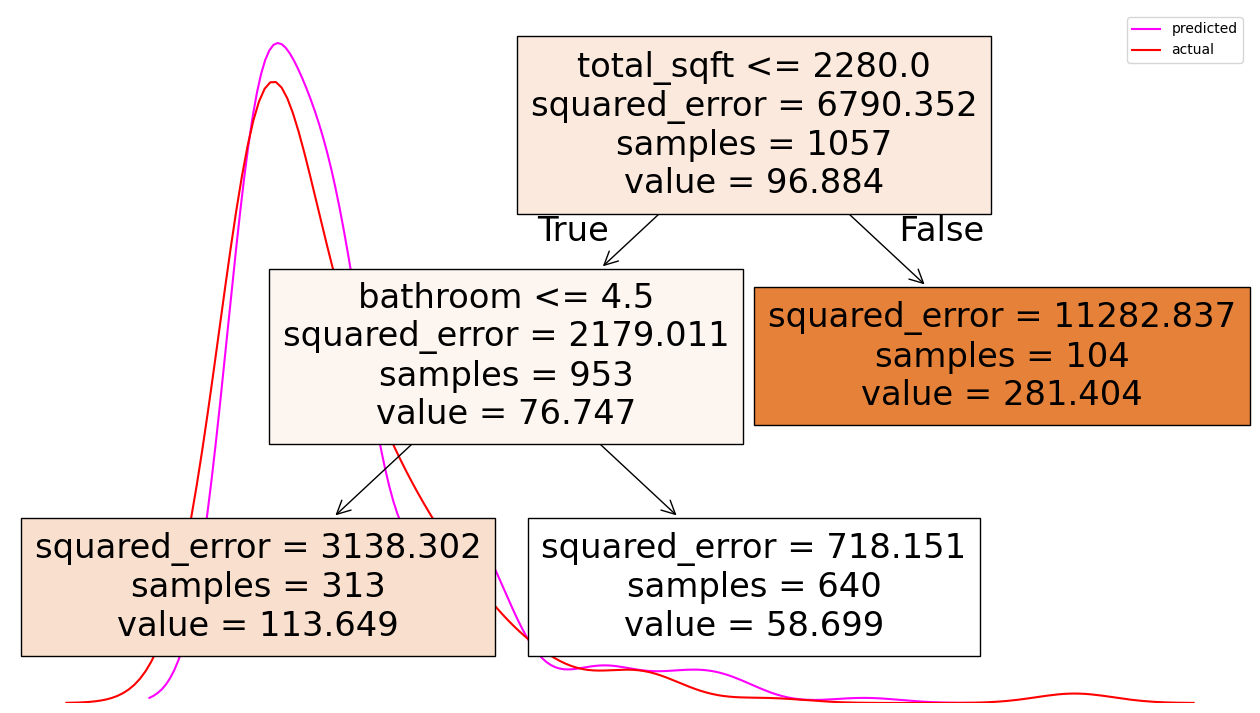

In [146]:
sn.distplot(new_df['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
sn.distplot(new_df['actual'],label='actual',hist = False,kde = True,color='red')
plt.legend()
plt.show()

In [147]:
train_test = np.array(train)
predict = []
for i in range(0,len(train_test)):
    predict.append(rf.predict([train_test[i]]))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: U

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\4288127514.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\4288127514.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

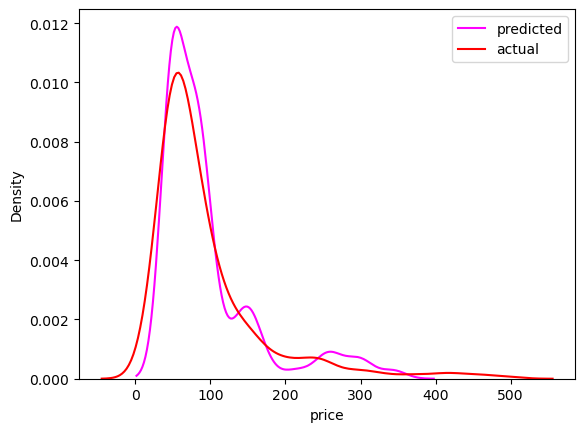

In [148]:
predict = np.array(predict)
data['predicted'] = predict
sn.distplot(data['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
sn.distplot(data['price'],label='actual',hist = False,kde = True,color='red')
plt.legend()
plt.show()

### XGBOOST

In [150]:
xgb = XGBRegressor(booster='dart', gamma=1.5, importance_type='weight',
             learning_rate=0.05, n_estimator=1077, reg_alpha=0.25,
             reg_lambda=3)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:02:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.9035361627307827

In [151]:
y_pred = xgb.predict(X_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)
pred_df = pd.DataFrame(y_pred)
test_df = pd.DataFrame(y_test)
new_df1 = pd.concat([test_df,pred_df],axis = 1)
new_df1.columns = ['actual','predicted']

In [152]:
new_df1

,actual,predicted
0,57.390,109.917877
1,185.000,190.699158
2,126.000,56.305122
3,86.000,89.368507
4,43.510,59.510765
5,90.000,83.595284
6,52.500,86.463463
7,39.000,47.001541
8,55.000,66.999084
9,55.550,80.753143


C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3955735782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(new_df1['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3955735782.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

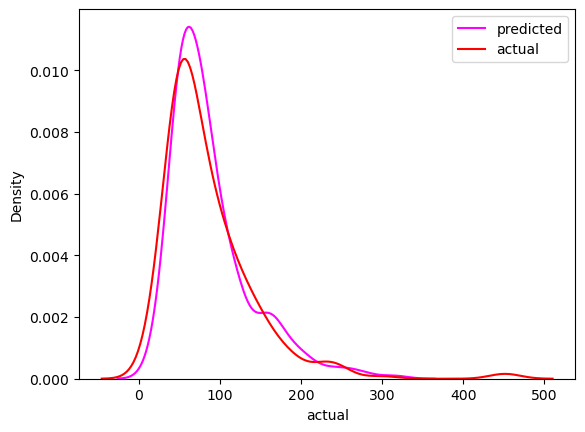

In [153]:
sn.distplot(new_df1['predicted'],label = 'predicted',hist=False,kde = True,color='magenta')
sn.distplot(new_df1['actual'],label='actual',hist = False,kde = True,color='red')
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\496886557.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(new_df[i],hist = False,kde=True,label = 'rf',color = 'magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\496886557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.d

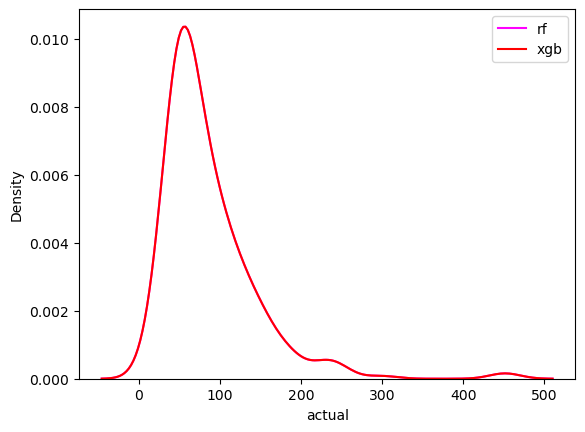

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\496886557.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(new_df[i],hist = False,kde=True,label = 'rf',color = 'magenta')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\496886557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.d

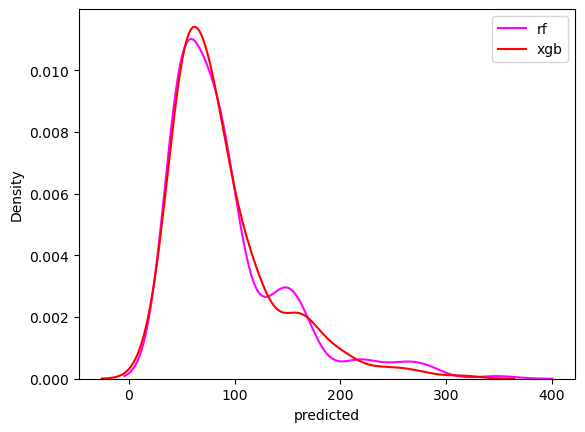

In [154]:
for i,j in zip(new_df.columns,new_df1.columns):
    sn.distplot(new_df[i],hist = False,kde=True,label = 'rf',color = 'magenta')
    sn.distplot(new_df1[j],hist=False,kde=True,label= 'xgb',color = 'red')
    plt.legend()
    plt.show()

In [155]:
import pickle

In [156]:
file = open('hyd_house_rf.pkl','wb')
pickle.dump(rf,file)
file.close()

In [157]:
file1 = open('hyd_house_xgb.pkl','wb')
pickle.dump(xgb,file1)
file1.close()

In [158]:
mean_map

[location
 Addagutta                   172.480000
 Adibatla                     78.789000
 Alkapuri                     61.279000
 Ambedkar Nagar               87.323000
 Ameerpet                    100.393000
 Aminpur                     136.631000
 Anjaiah Nagar               146.334000
 Anjaneya Nagar              140.525000
 Appa Junction               208.375000
 Arunodaya Colony            119.200000
 Attapur                      69.290000
 Ayyappa Society             121.250000
 Bachupally                   78.212000
 Balaji Hills Colony         113.665000
 Bandam Kommu                144.714000
 Bandlaguda                   64.250000
 Bangalore Highway            91.500000
 Banjara Hills               104.603000
 Beeramguda                   99.603000
 Begumpet                    149.155500
 Boduppal                    215.188000
 Bowenpally                   99.250000
 Camelot Layout              129.719000
 Chandanagar                 134.655000
 D.D. Colony                  